# Statistical plotting with Seaborn (regression plots, distribution plots)


### Estimating regression fits

Seaborn provides functions to visually explore relationships between variables in datasets using regression plots. These plots help highlight patterns in data during exploratory analysis. However, Seaborn itself is not meant for detailed statistical analysis. For quantitative measures related to regression model fits, it's recommended to use packages like statsmodels. Seaborn focuses on making dataset exploration through visualization fast and intuitive, emphasizing its importance alongside traditional statistical methods.

### Functions for drawing linear regression models

to visualize a linear fit are regplot() and lmplot() and both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression

<Axes: xlabel='total_bill', ylabel='tip'>

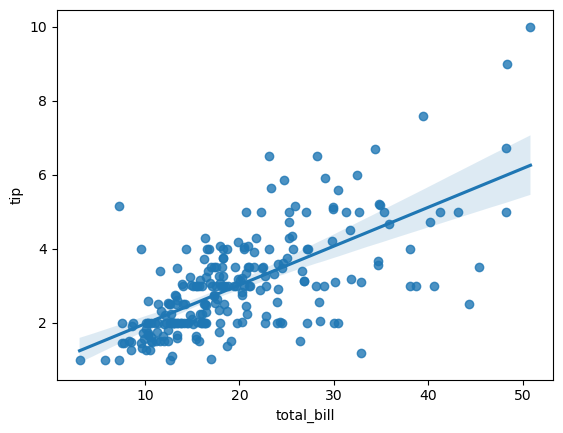

In [4]:
tips = sns.load_dataset("tips")
sns.regplot(x="total_bill", y="tip", data=tips)

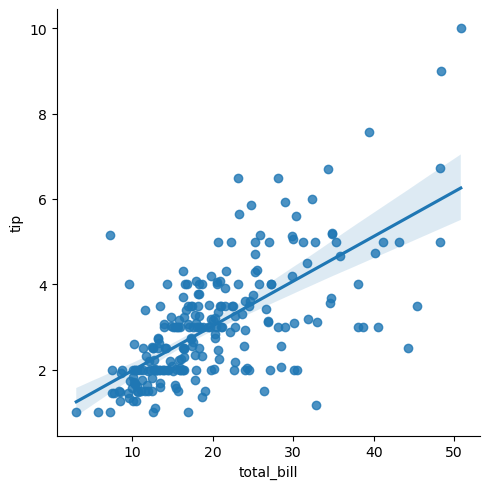

In [5]:
sns.lmplot(x="total_bill", y="tip", data=tips);

# Functionality:

regplot() is used for plotting on a single axes, while lmplot() creates a figure-level plot.
regplot() accepts various data formats directly for x and y.
lmplot() requires a data parameter and specifies x and y variables as strings.
Only lmplot() supports the hue parameter for categorical color grouping.

### focus on lmplot()

It’s possible to fit a linear regression when one of the variables takes discrete values, however, the simple scatterplot produced by this kind of dataset is often not optimal:

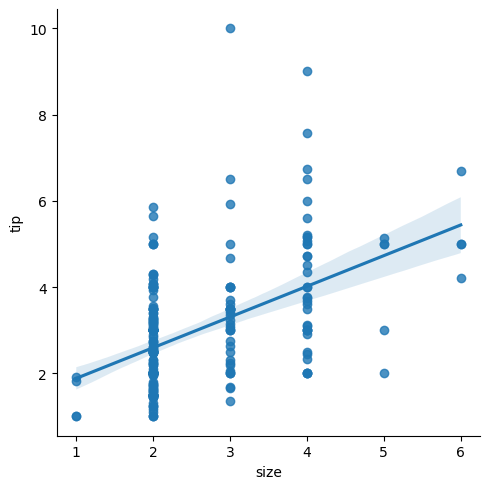

In [6]:
sns.lmplot(x="size", y="tip", data=tips)

One option is to add some random noise (“jitter”) to the discrete values to make the distribution of those values more clear. Note that jitter is applied only to the scatterplot data and does not influence the regression line fit itself:

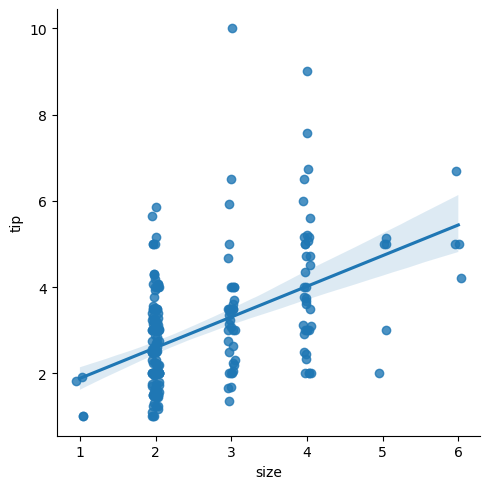

In [8]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05)

A second option is to collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:

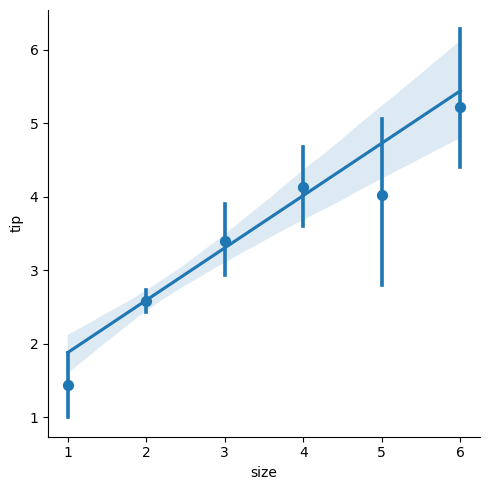

In [10]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)

### Fitting different kinds of models

The simple linear regression model used above is very simple to fit, however, it is not appropriate for some kinds of datasets. The Anscombe’s quartet dataset shows a few examples where simple linear regression provides an identical estimate of a relationship where simple visual inspection clearly shows differences. For example, in the first case, the linear regression is a good model:

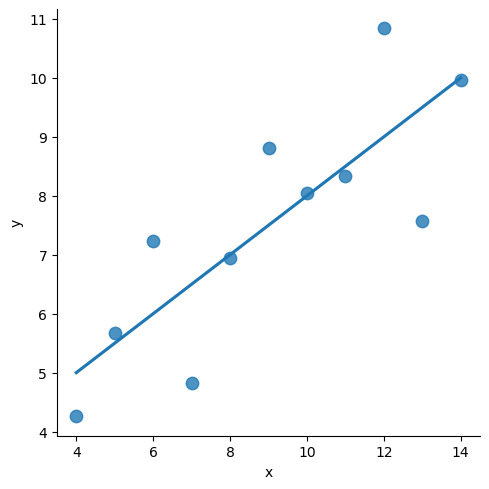

In [11]:
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});


The linear relationship in the second dataset is the same, but the plot clearly shows that this is not a good model:

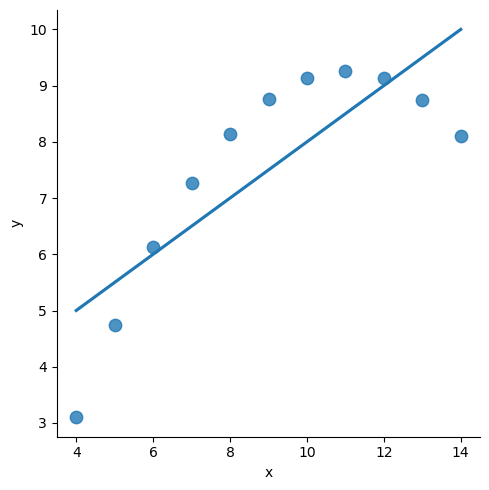

In [13]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80})

In the presence of these kind of higher-order relationships, lmplot() and regplot() can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset:

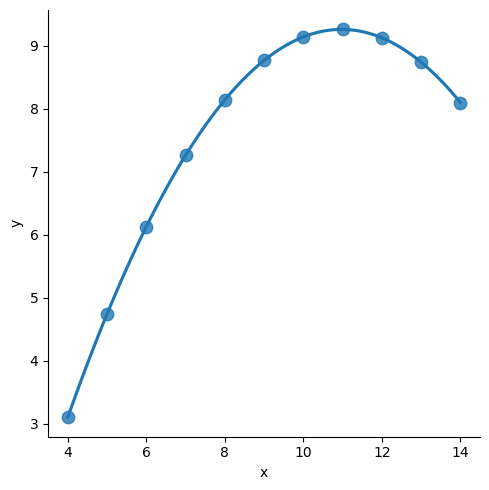

In [14]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

A different problem is posed by “outlier” observations that deviate for some reason other than the main relationship under study:

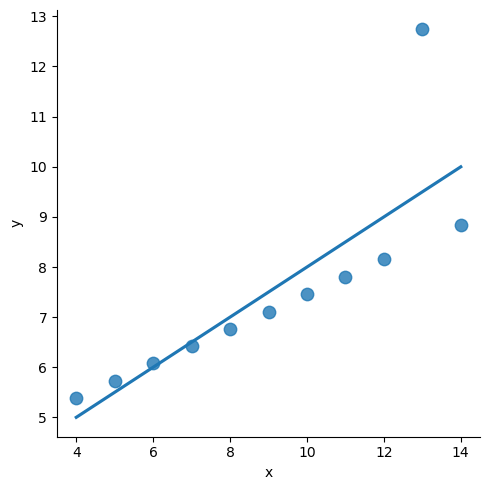

In [15]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals:

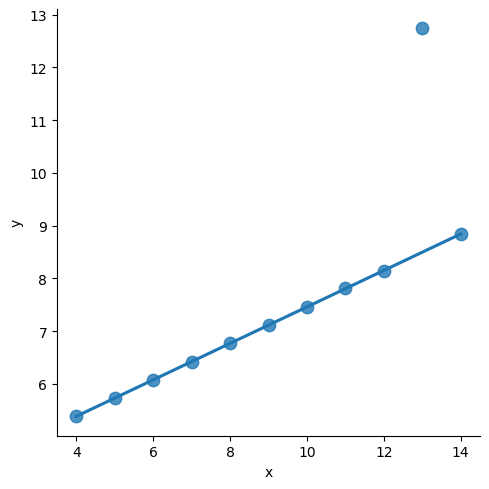

In [16]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

When the y variable is binary, simple linear regression also “works” but provides implausible predictions:

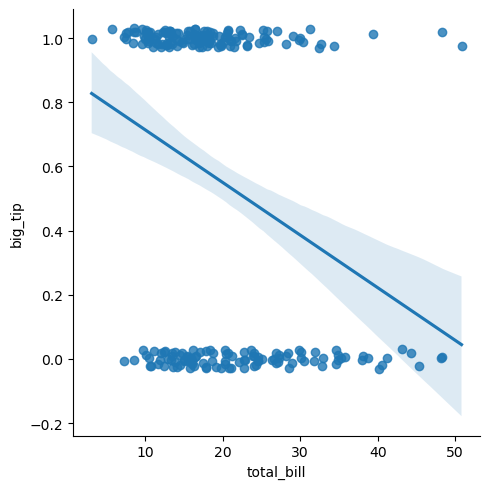

In [17]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of y = 1 for a given value of x:

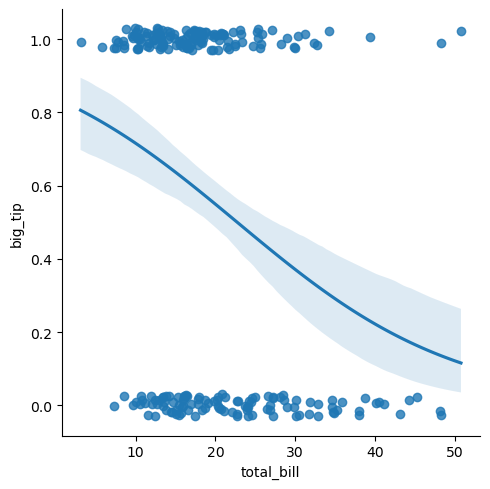

In [18]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

 logistic regression and robust regression are more computationally intensive compared to standard linear regression. To speed up iterations, one can disable confidence intervals around the regression line using ci=None. Alternatively, nonparametric regression using a lowess smoother offers an assumption-free approach but is computationally intensive, currently without computed confidence intervals. These methods provide flexibility in regression analysis depending on computational resources and the need for statistical assumptions.

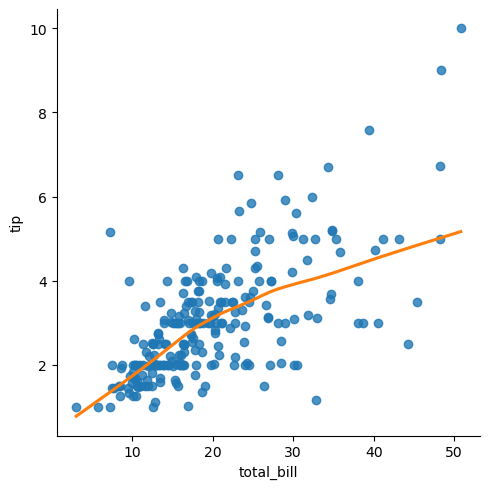

In [19]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True, line_kws={"color": "C1"});

The residplot() function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. It fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around y = 0:

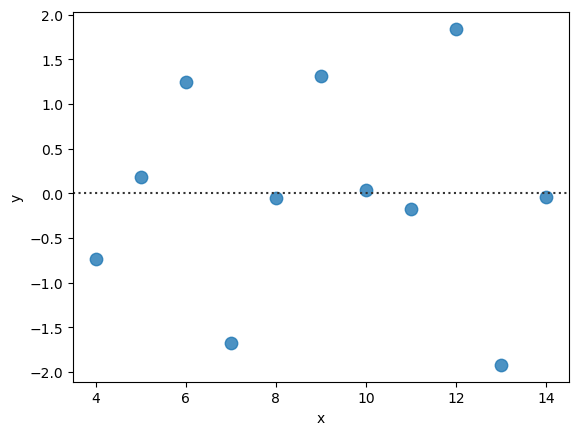

In [20]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

If there is structure in the residuals, it suggests that simple linear regression is not appropriate:

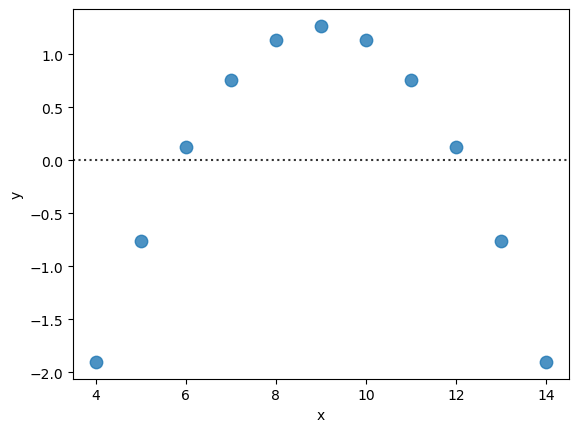

In [21]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

### Conditioning on other variables

The plots above show many ways to explore the relationship between a pair of variables. Often, however, a more interesting question is “how does the relationship between these two variables change as a function of a third variable?” This is where the main differences between regplot() and lmplot() appear. While regplot() always shows a single relationship, lmplot() combines regplot() with FacetGrid to show multiple fits using hue mapping or faceting.

The best way to separate out a relationship is to plot both levels on the same axes and to use color to distinguish them:

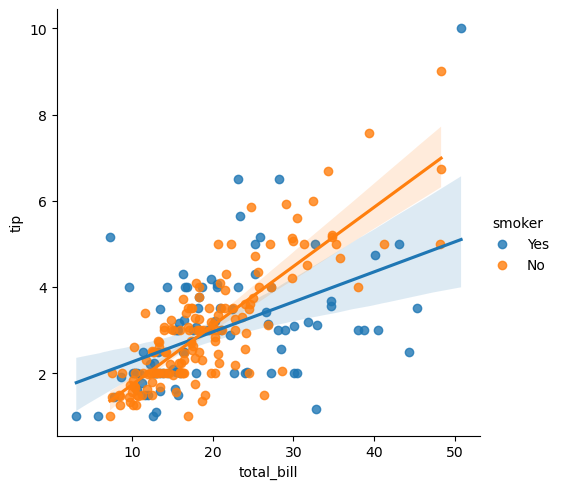

In [22]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

Unlike relplot(), it’s not possible to map a distinct variable to the style properties of the scatter plot, but you can redundantly code the hue variable with marker shape:

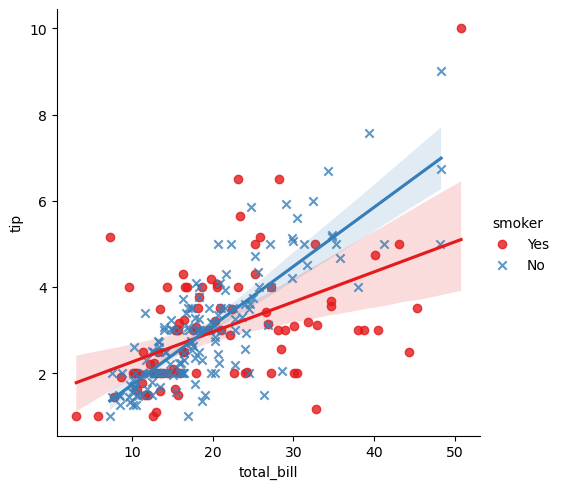

In [23]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

to add another variable, you can draw multiple “facets” with each level of the variable appearing in the rows or columns of the grid:

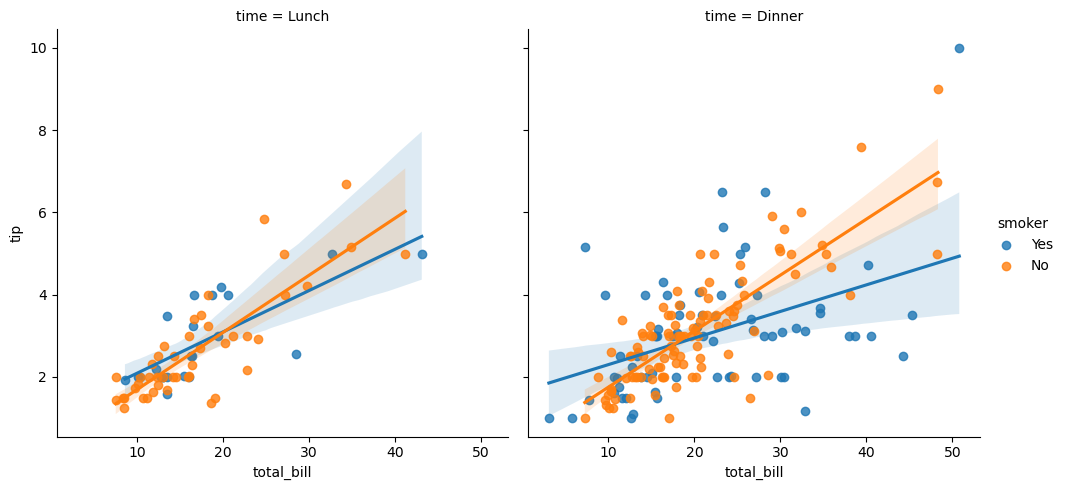

In [24]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

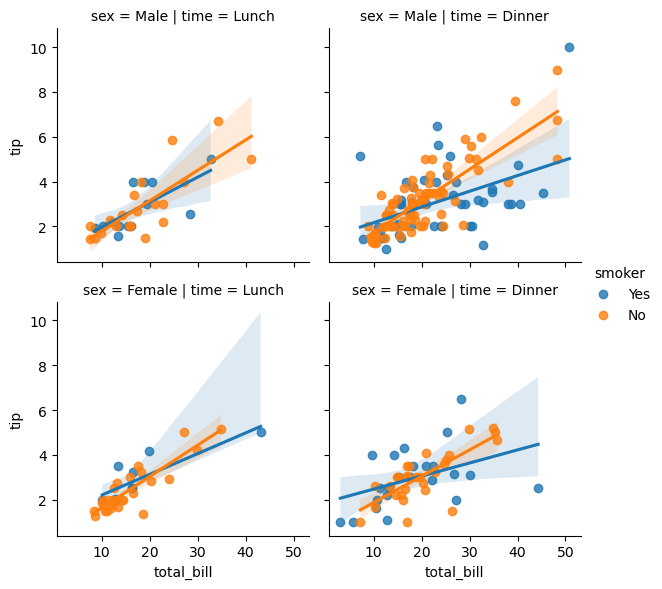

In [25]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips, height=3);

### Multiple Linear Regression Plot

Plot data and regression model fits across a FacetGrid.

This function combines regplot() and FacetGrid. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

### Examples

See the regplot() docs for demonstrations of various options for specifying the regression model, which are also accepted here.

Plot a regression fit over a scatter plot:

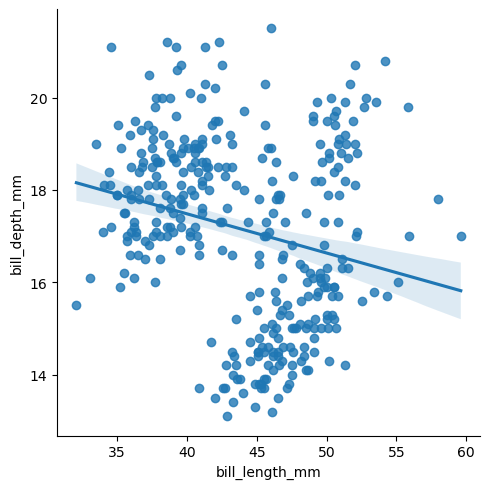

In [28]:
penguins = sns.load_dataset('penguins')
sns.lmplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

Condition the regression fit on another variable and represent it using color:

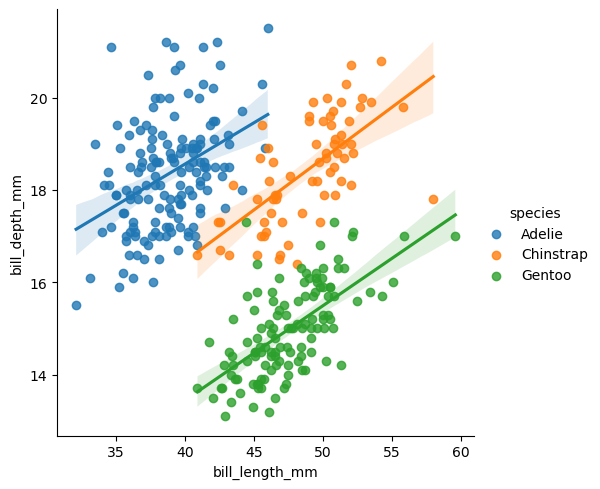

In [29]:
sns.lmplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

Condition the regression fit on another variable and split across subplots:

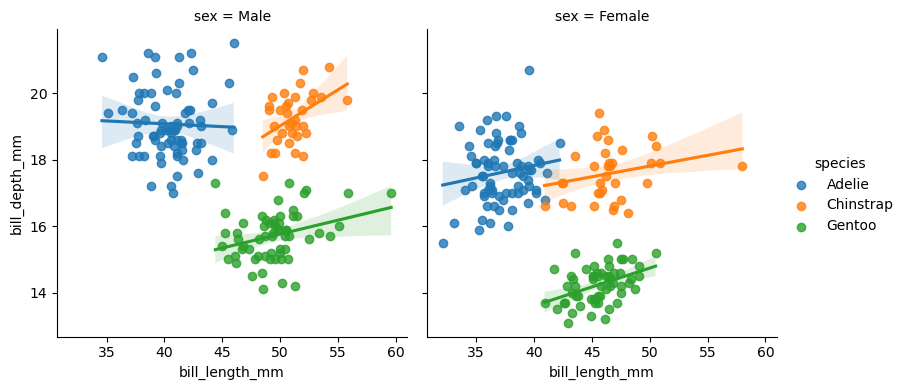

In [30]:
sns.lmplot(
    data=penguins, x="bill_length_mm", y="bill_depth_mm",
    hue="species", col="sex", height=4,
)

Condition across two variables using both columns and rows:

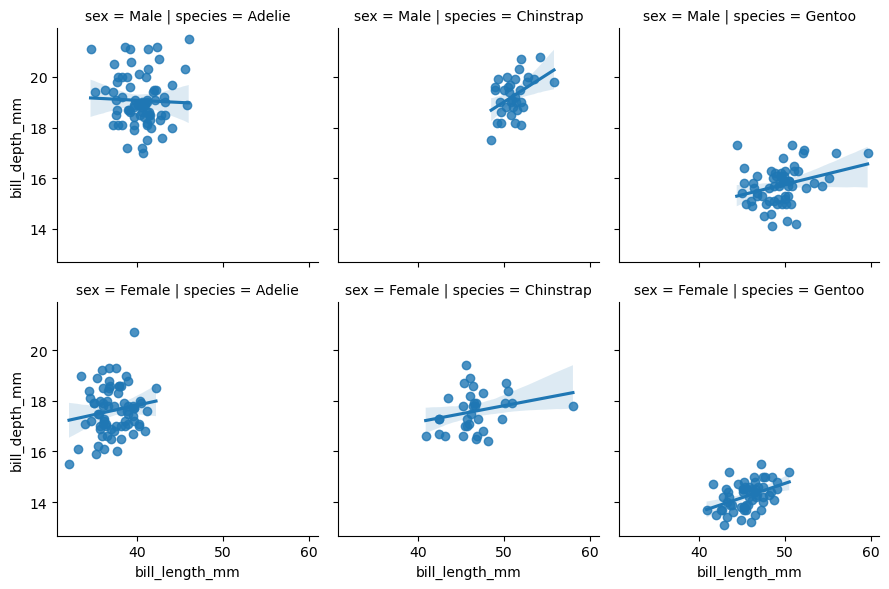

In [31]:
sns.lmplot(
    data=penguins, x="bill_length_mm", y="bill_depth_mm",
    col="species", row="sex", height=3,
)

Allow axis limits to vary across subplots:

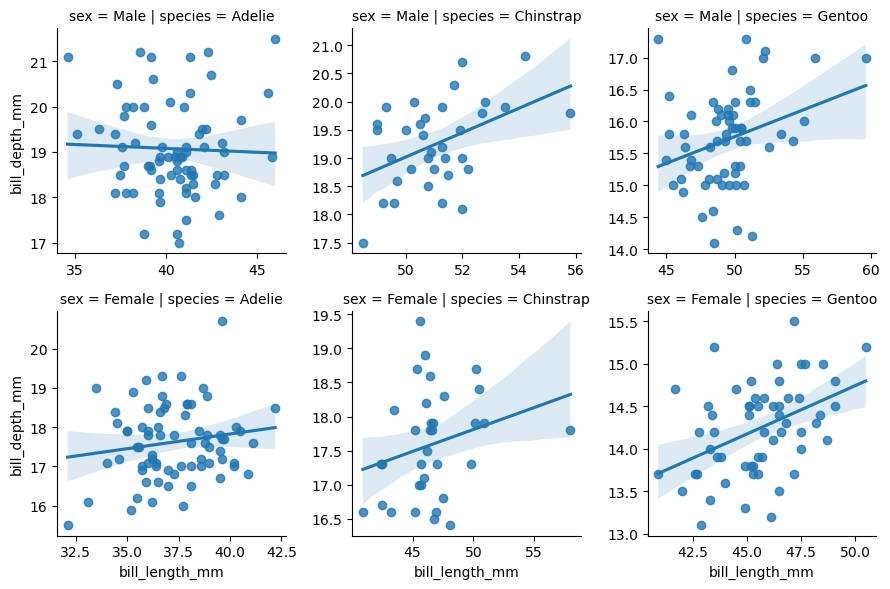

In [32]:
sns.lmplot(
    data=penguins, x="bill_length_mm", y="bill_depth_mm",
    col="species", row="sex", height=3,
    facet_kws=dict(sharex=False, sharey=False),
)

### Residual Plot 

This function will regress y on x (possibly as a robust or polynomial regression) and then draw a scatterplot of the residuals. You can optionally fit a lowess smoother to the residual plot, which can help in determining if there is structure to the residuals.

### Examples

Pass x and y to see a scatter plot of the residuals after fitting a simple regression model:

<Axes: xlabel='weight', ylabel='displacement'>

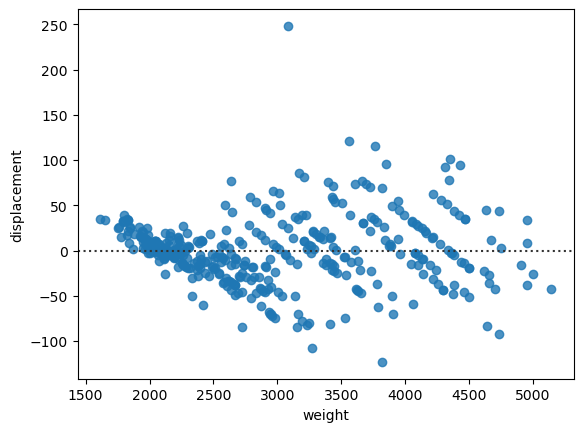

In [34]:
mpg = sns.load_dataset('mpg')
sns.residplot(data=mpg, x="weight", y="displacement")

Structure in the residual plot can reveal a violation of linear regression assumptions:

<Axes: xlabel='horsepower', ylabel='mpg'>

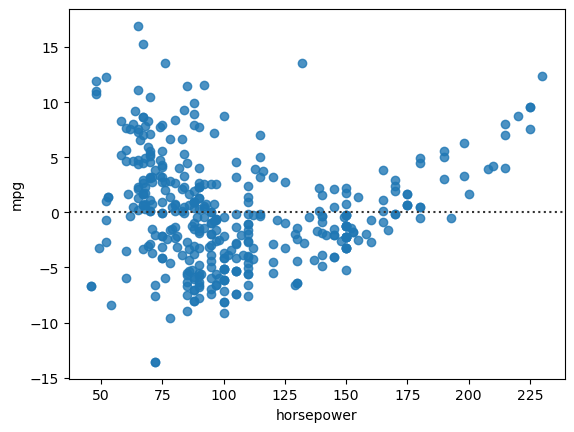

In [35]:
sns.residplot(data=mpg, x="horsepower", y="mpg")

Remove higher-order trends to test whether that stabilizes the residuals:

<Axes: xlabel='horsepower', ylabel='mpg'>

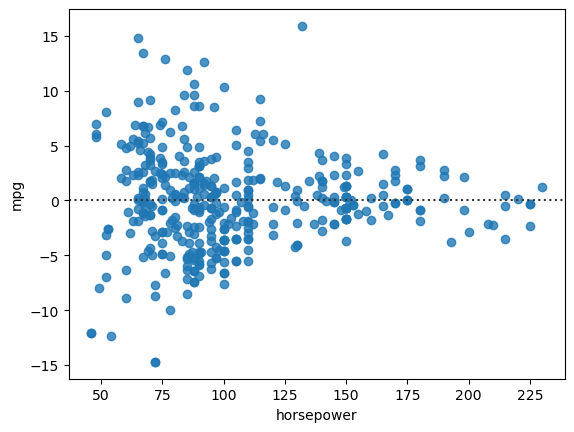

In [36]:
sns.residplot(data=mpg, x="horsepower", y="mpg", order=2)

Adding a LOWESS curve can help reveal or emphasize structure:

<Axes: xlabel='horsepower', ylabel='mpg'>

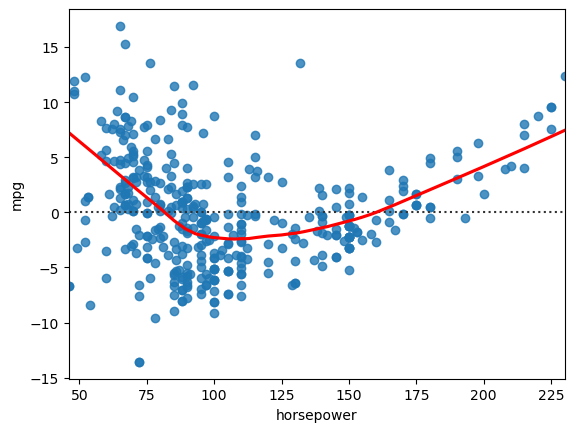

In [37]:
sns.residplot(data=mpg, x="horsepower", y="mpg", lowess=True, line_kws=dict(color="r"))

### histogram

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

This function can normalize the statistic computed within each bin to estimate frequency, density or probability mass, and it can add a smooth curve obtained using a kernel density estimate, similar to kdeplot().

## See also

displot
Figure-level interface to distribution plot functions.

kdeplot
Plot univariate or bivariate distributions using kernel density estimation.

rugplot
Plot a tick at each observation value along the x and/or y axes.

ecdfplot
Plot empirical cumulative distribution functions.

jointplot
Draw a bivariate plot with univariate marginal distributions.

### Examples

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

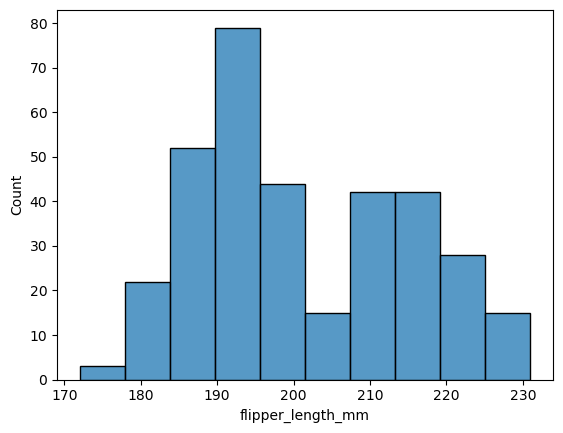

In [40]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm")

 Flip the plot by assigning the data variable to the y axis:

<Axes: xlabel='Count', ylabel='flipper_length_mm'>

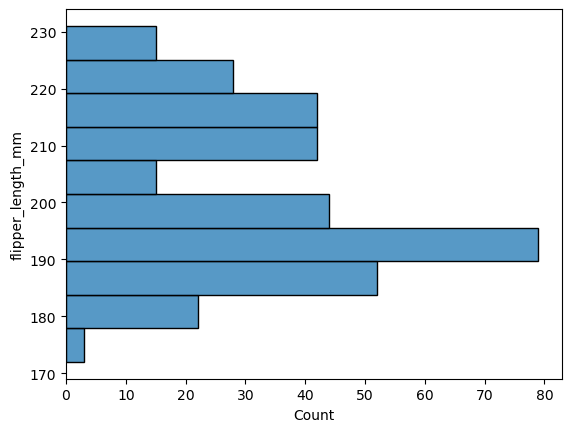

In [41]:
sns.histplot(data=penguins, y="flipper_length_mm")

Check how well the histogram represents the data by specifying a different bin width:

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

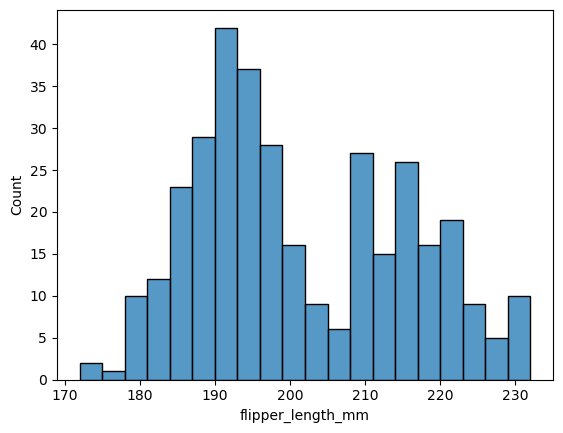

In [43]:
sns.histplot(data=penguins, x="flipper_length_mm", binwidth=3)

You can also define the total number of bins to use:

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

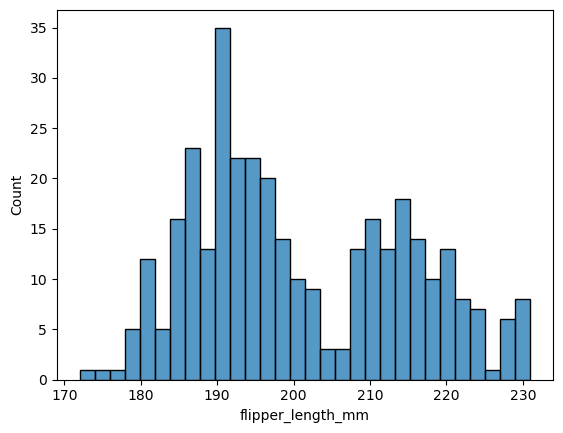

In [44]:
sns.histplot(data=penguins, x="flipper_length_mm", bins=30)

Add a kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution:

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

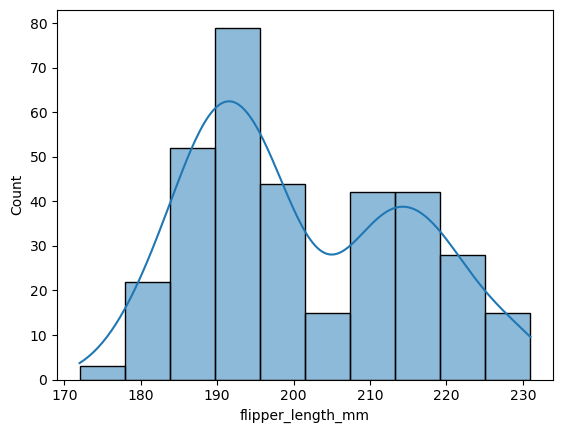

In [45]:
sns.histplot(data=penguins, x="flipper_length_mm", kde=True)

If neither x nor y is assigned, the dataset is treated as wide-form, and a histogram is drawn for each numeric column:

<Axes: ylabel='Count'>

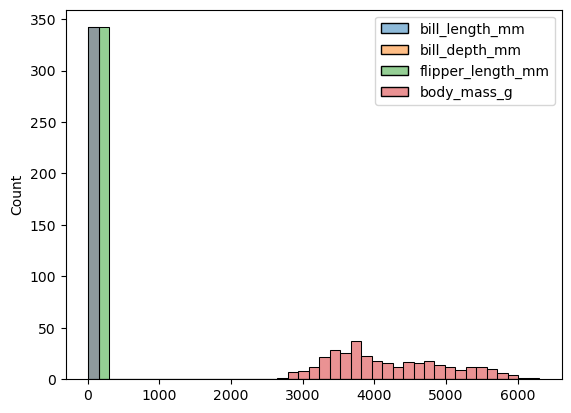

In [46]:
sns.histplot(data=penguins)

You can otherwise draw multiple histograms from a long-form dataset with hue mapping:

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

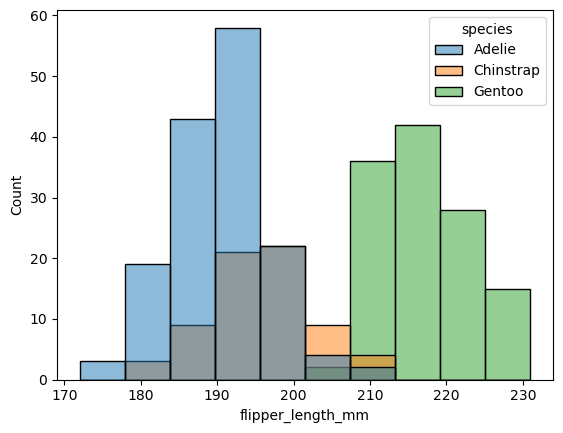

In [47]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species")

The default approach to plotting multiple distributions is to “layer” them, but you can also “stack” them:

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

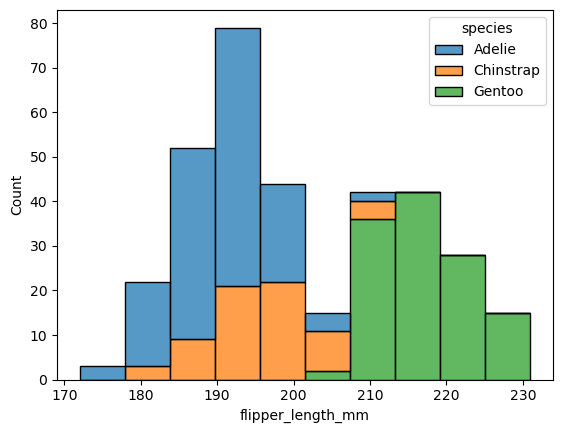

In [48]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

Overlapping bars can be hard to visually resolve. A different approach would be to draw a step function:

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

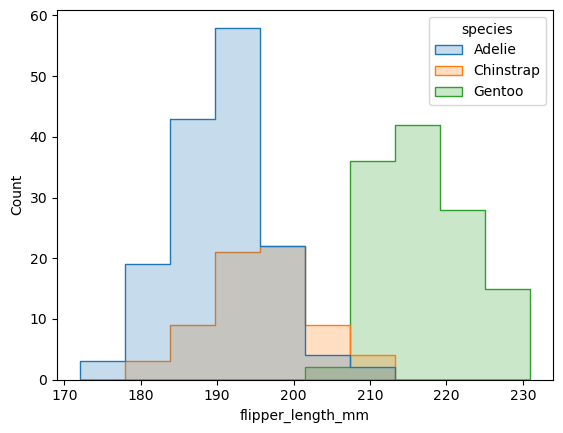

In [49]:
sns.histplot(penguins, x="flipper_length_mm", hue="species", element="step")

You can move even farther away from bars by drawing a polygon with vertices in the center of each bin. This may make it easier to see the shape of the distribution, but use with caution: it will be less obvious to your audience that they are looking at a histogram:

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

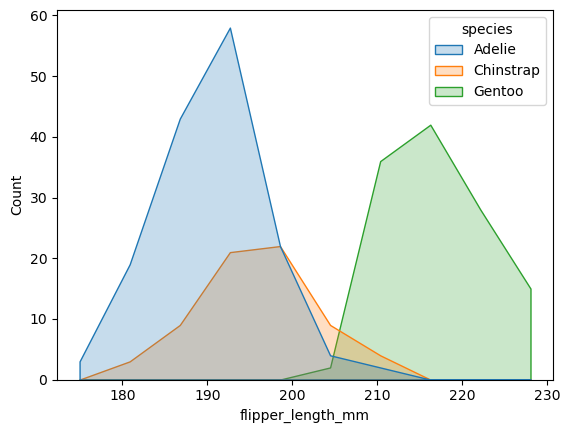

In [50]:
sns.histplot(penguins, x="flipper_length_mm", hue="species", element="poly")

To compare the distribution of subsets that differ substantially in size, use independent density normalization:

<Axes: xlabel='bill_length_mm', ylabel='Density'>

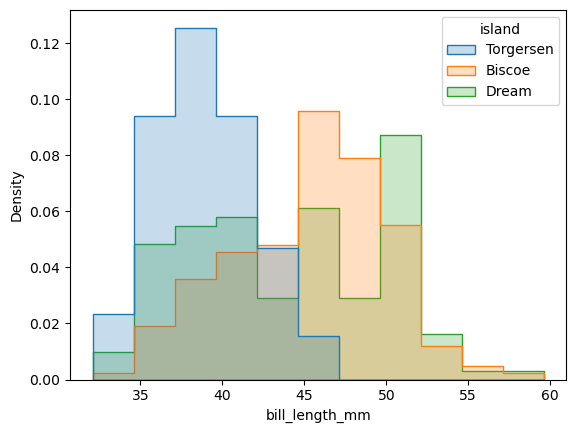

In [51]:
sns.histplot(
    penguins, x="bill_length_mm", hue="island", element="step",
    stat="density", common_norm=False,
)

It’s also possible to normalize so that each bar’s height shows a probability, proportion, or percent, which make more sense for discrete variables:

<Axes: xlabel='size', ylabel='Percent'>

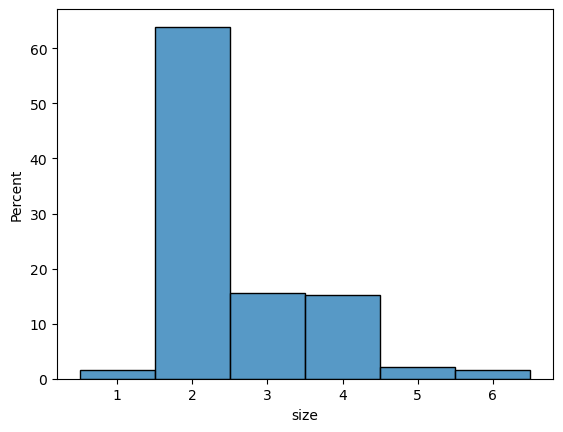

In [52]:
tips = sns.load_dataset("tips")
sns.histplot(data=tips, x="size", stat="percent", discrete=True)

You can even draw a histogram over categorical variables (although this is an experimental feature):

<Axes: xlabel='day', ylabel='Count'>

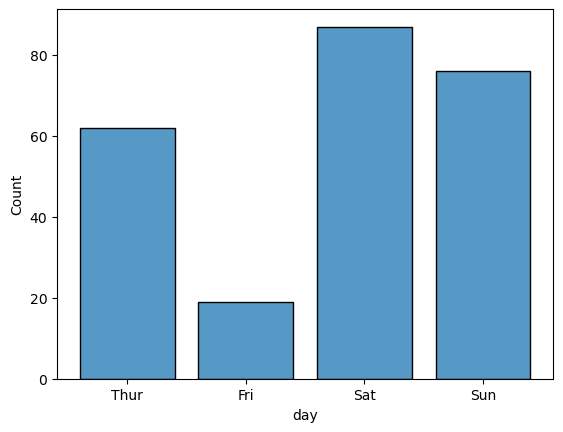

In [53]:
sns.histplot(data=tips, x="day", shrink=.8)

When using a hue semantic with discrete data, it can make sense to “dodge” the levels:

<Axes: xlabel='day', ylabel='Count'>

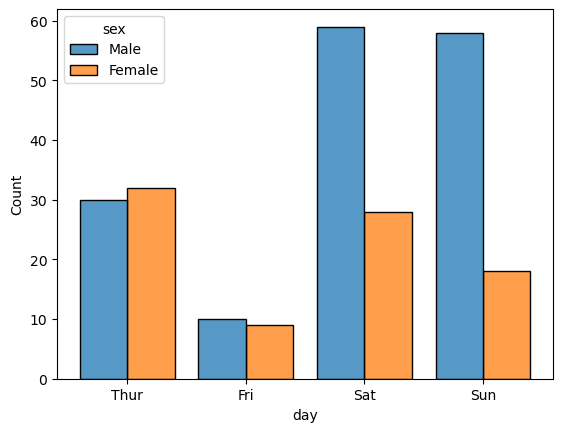

In [54]:
sns.histplot(data=tips, x="day", hue="sex", multiple="dodge", shrink=.8)

Real-world data is often skewed. For heavily skewed distributions, it’s better to define the bins in log space. Compare:

<Axes: xlabel='distance', ylabel='Count'>

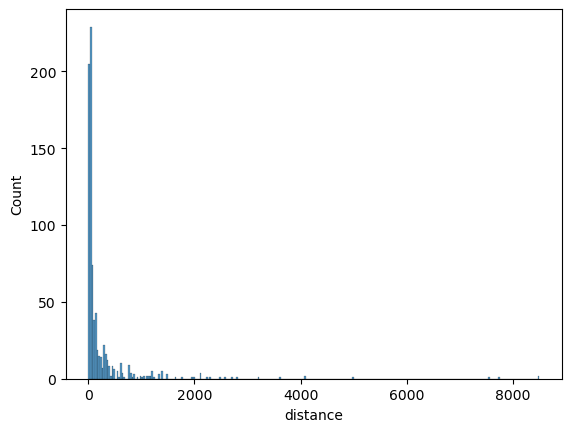

In [55]:
planets = sns.load_dataset("planets")
sns.histplot(data=planets, x="distance")

To the log-scale version:

<Axes: xlabel='distance', ylabel='Count'>

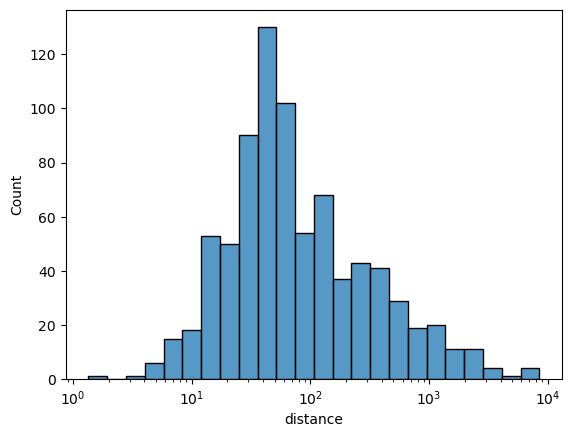

In [56]:
sns.histplot(data=planets, x="distance", log_scale=True)

There are also a number of options for how the histogram appears. You can show unfilled bars:

<Axes: xlabel='distance', ylabel='Count'>

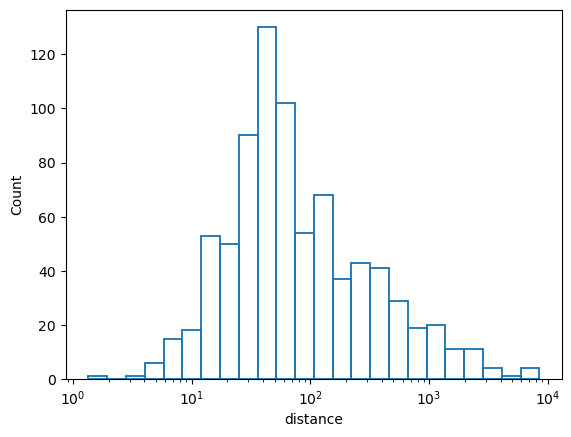

In [57]:
sns.histplot(data=planets, x="distance", log_scale=True, fill=False)

Or an unfilled step function:

<Axes: xlabel='distance', ylabel='Count'>

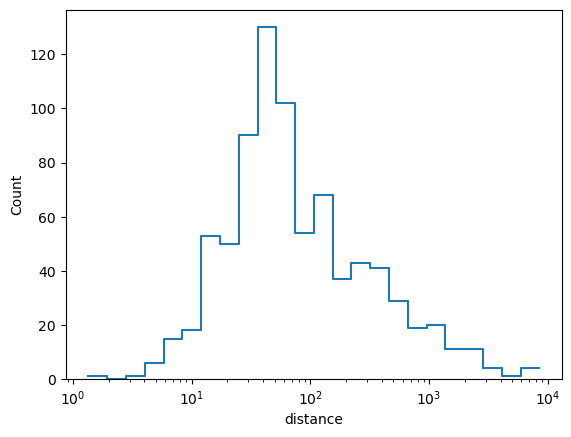

In [58]:
sns.histplot(data=planets, x="distance", log_scale=True, element="step", fill=False)

Step functions, especially when unfilled, make it easy to compare cumulative histograms:

<Axes: xlabel='distance', ylabel='Density'>

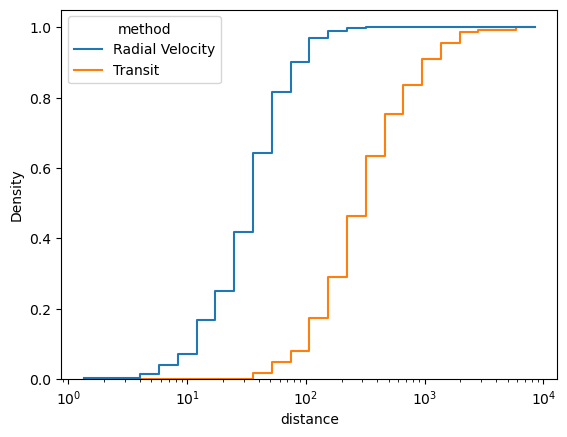

In [59]:
sns.histplot(
    data=planets, x="distance", hue="method",
    hue_order=["Radial Velocity", "Transit"],
    log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)

### Kdplot

Plot univariate or bivariate distributions using kernel density estimation.

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

Plot a univariate distribution along the x axis:

<Axes: xlabel='total_bill', ylabel='Density'>

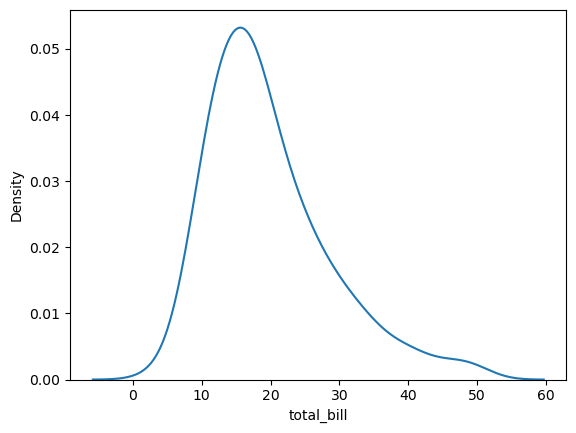

In [60]:
tips = sns.load_dataset("tips")
sns.kdeplot(data=tips, x="total_bill")

Flip the plot by assigning the data variable to the y axis:

<Axes: xlabel='Density', ylabel='total_bill'>

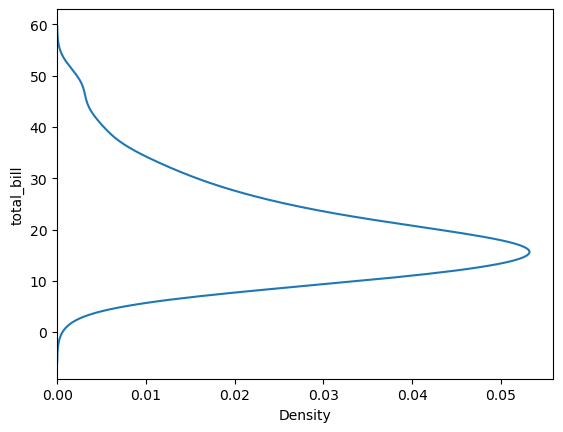

In [61]:
sns.kdeplot(data=tips, y="total_bill")

Plot distributions for each column of a wide-form dataset:

<Axes: ylabel='Density'>

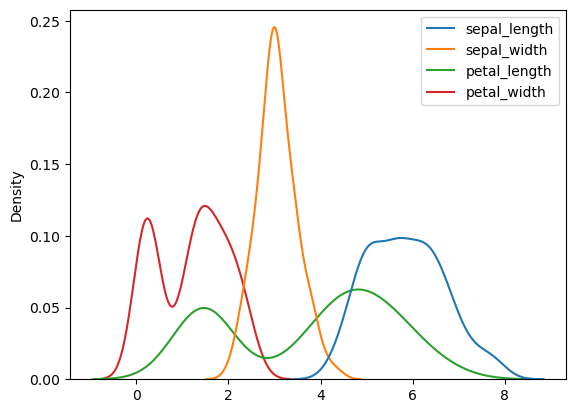

In [62]:
iris = sns.load_dataset("iris")
sns.kdeplot(data=iris)

Use less smoothing:

<Axes: xlabel='total_bill', ylabel='Density'>

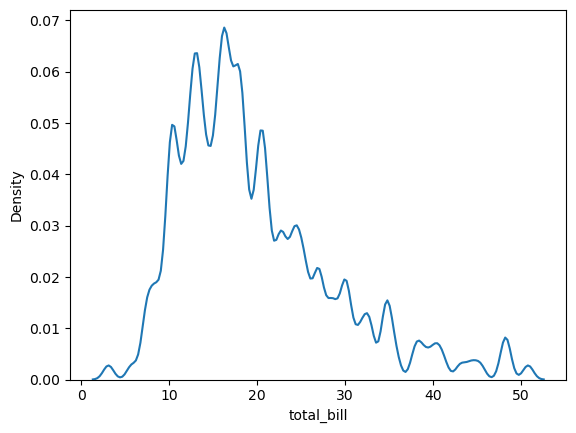

In [63]:
sns.kdeplot(data=tips, x="total_bill", bw_adjust=.2)

Plot conditional distributions with hue mapping of a second variable:

<Axes: xlabel='total_bill', ylabel='Density'>

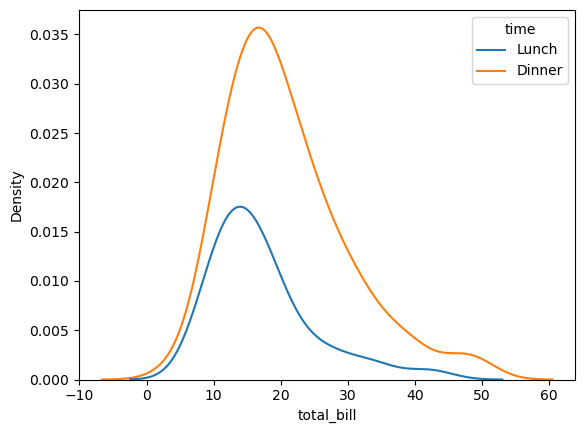

In [64]:
sns.kdeplot(data=tips, x="total_bill", hue="time")

“Stack” the conditional distributions:

<Axes: xlabel='total_bill', ylabel='Density'>

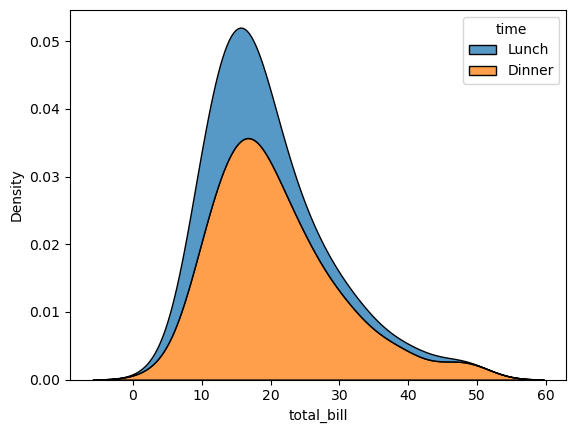

In [65]:
sns.kdeplot(data=tips, x="total_bill", hue="time", multiple="stack")

Normalize the stacked distribution at each value in the grid:

<Axes: xlabel='total_bill', ylabel='Density'>

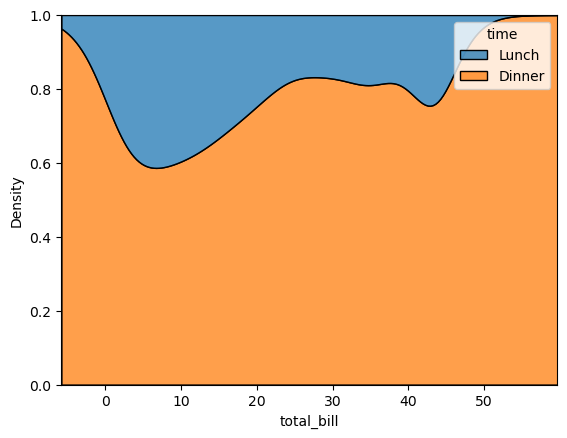

In [66]:
sns.kdeplot(data=tips, x="total_bill", hue="time", multiple="fill")

Estimate the cumulative distribution function(s), normalizing each subset:`

<Axes: xlabel='total_bill', ylabel='Density'>

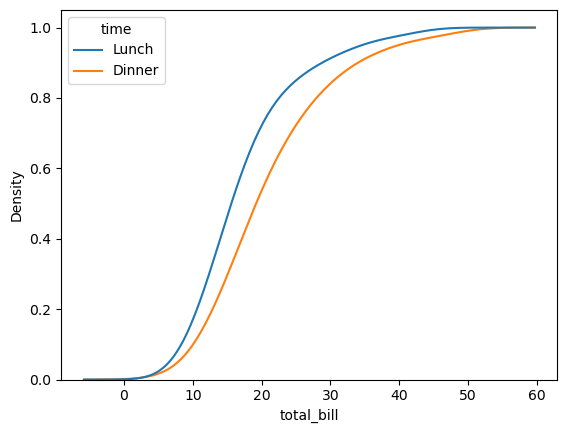

In [67]:
sns.kdeplot(
    data=tips, x="total_bill", hue="time",
    cumulative=True, common_norm=False, common_grid=True,
)

 Estimate distribution from aggregated data, using weights:

<Axes: xlabel='total_bill', ylabel='Density'>

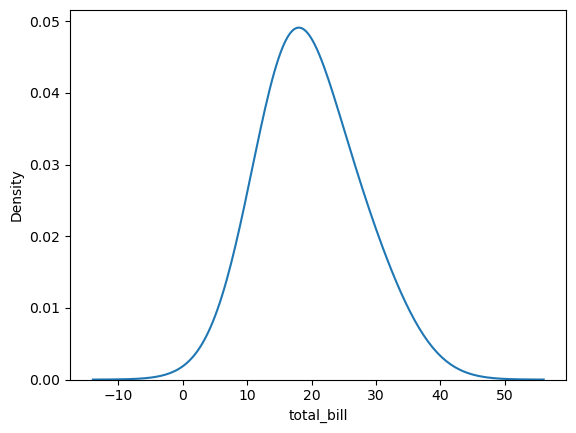

In [69]:
tips_agg = (tips
    .groupby("size")
    .agg(total_bill=("total_bill", "mean"), n=("total_bill", "count"))
)
sns.kdeplot(data=tips_agg, x="total_bill", weights="n")

Map the data variable with log scaling:

<Axes: xlabel='price', ylabel='Density'>

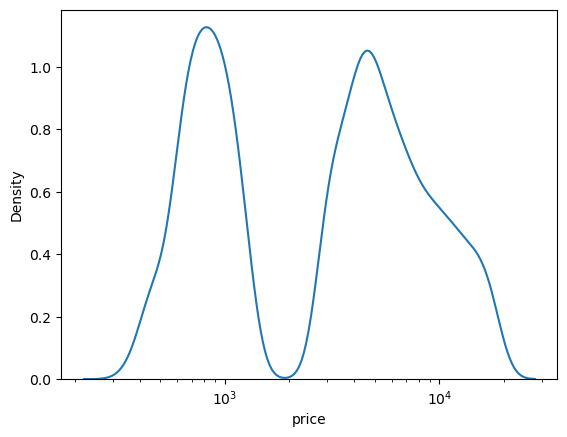

In [70]:
diamonds = sns.load_dataset("diamonds")
sns.kdeplot(data=diamonds, x="price", log_scale=True)

Use numeric hue mapping:

<Axes: xlabel='total_bill', ylabel='Density'>

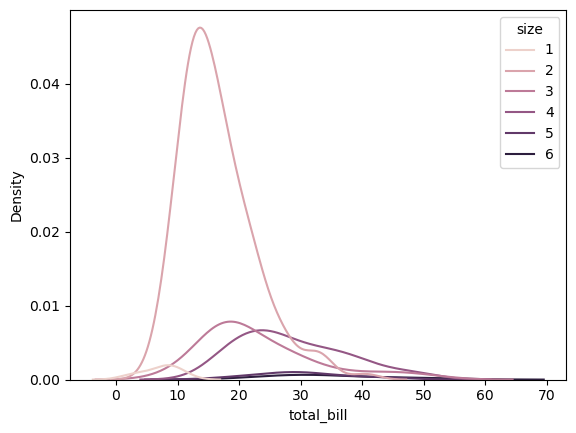

In [71]:
sns.kdeplot(data=tips, x="total_bill", hue="size")

Modify the appearance of the plot:

<Axes: xlabel='total_bill', ylabel='Density'>

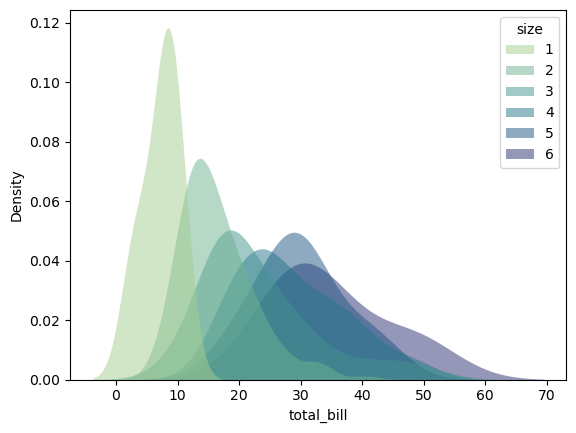

In [72]:
sns.kdeplot(
   data=tips, x="total_bill", hue="size",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

### Displot

This function has been deprecated and will be removed in seaborn v0.14.0. It has been replaced by histplot() and displot(), two functions with a modern API and many more capabilities.

### Boxplot

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

Draw a single horizontal boxplot, assigning the data directly to the coordinate variable:

<Axes: xlabel='age'>

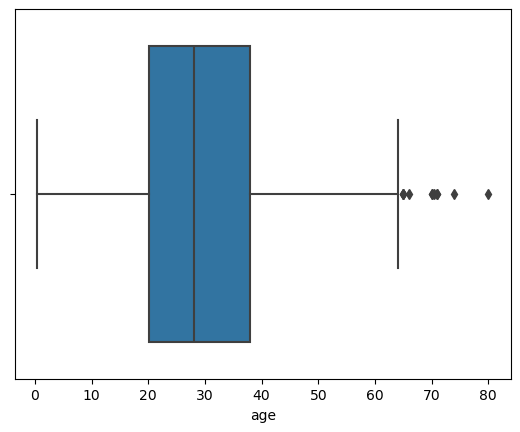

In [81]:
titanic = sns.load_dataset('titanic')
sns.boxplot(x=titanic["age"])

Group by a categorical variable, referencing columns in a dataframe:

<Axes: xlabel='age', ylabel='class'>

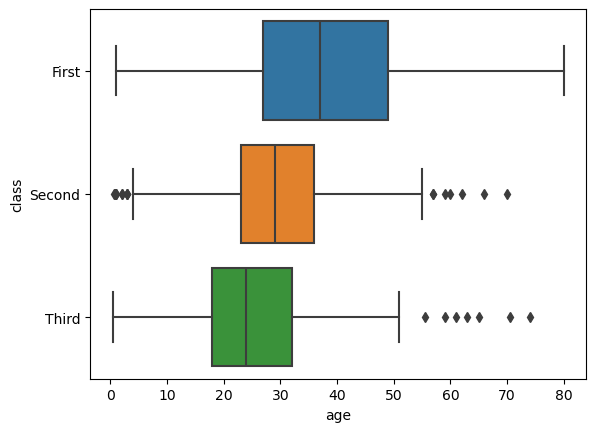

In [82]:
sns.boxplot(data=titanic, x="age", y="class")

Draw a vertical boxplot with nested grouping by two variables:

<Axes: xlabel='class', ylabel='age'>

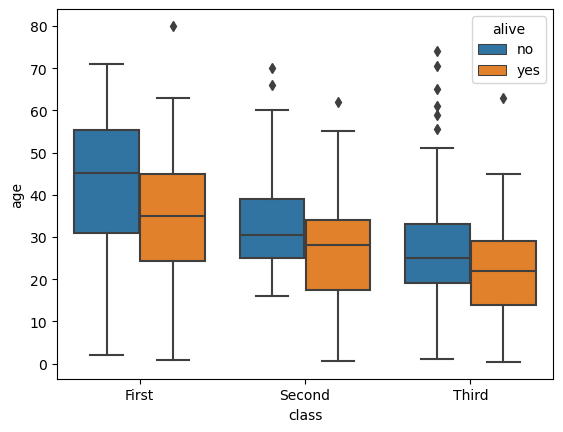

In [84]:
sns.boxplot(data=titanic, x="class", y="age", hue="alive")

Cover the full range of the data with the whiskers:

<Axes: xlabel='age', ylabel='deck'>

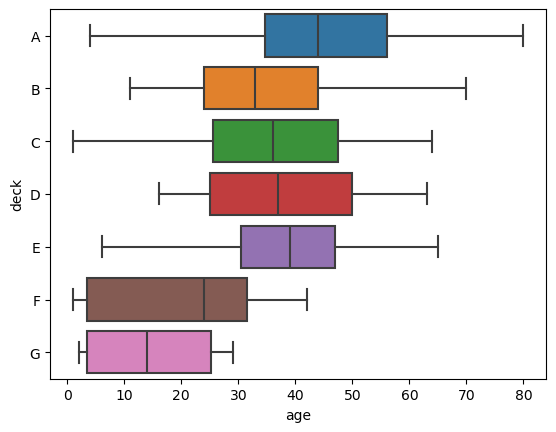

In [87]:
sns.boxplot(data=titanic, x="age", y="deck", whis=(0, 100))

raw narrower boxes:

<Axes: xlabel='age', ylabel='deck'>

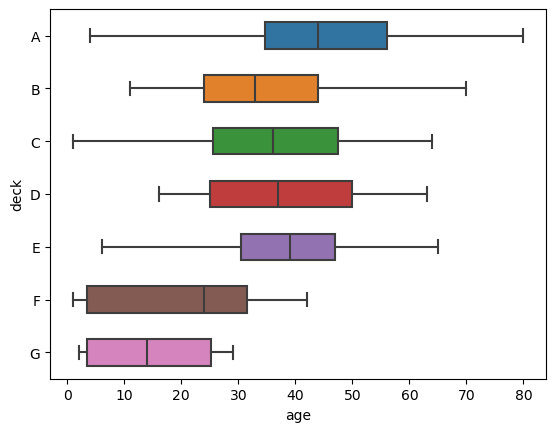

In [88]:
sns.boxplot(data=titanic, x="age", y="deck", width=.5)

### violinplot

A violin plot plays a similar role as a box-and-whisker plot. It shows the distribution of data points after grouping by one (or more) variables. Unlike a box plot, each violin is drawn using a kernel density estimate of the underlying distribution.

The default violinplot represents a distribution two ways: a patch showing a symmetric kernel density estimate (KDE), and the quartiles / whiskers of a box plot:`

<Axes: xlabel='age'>

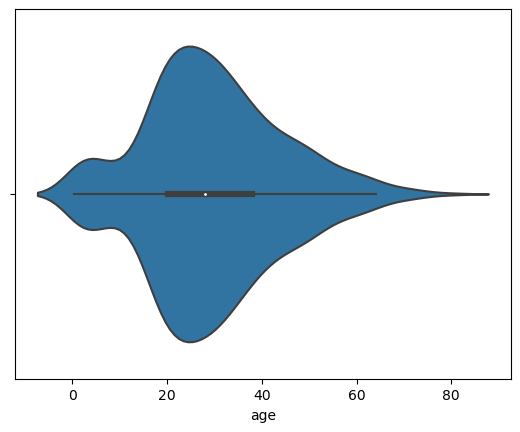

In [94]:
df = sns.load_dataset("titanic")
sns.violinplot(x=df["age"])

In a bivariate plot, one of the variables will “group” so that multiple violins are drawn:

<Axes: xlabel='age', ylabel='class'>

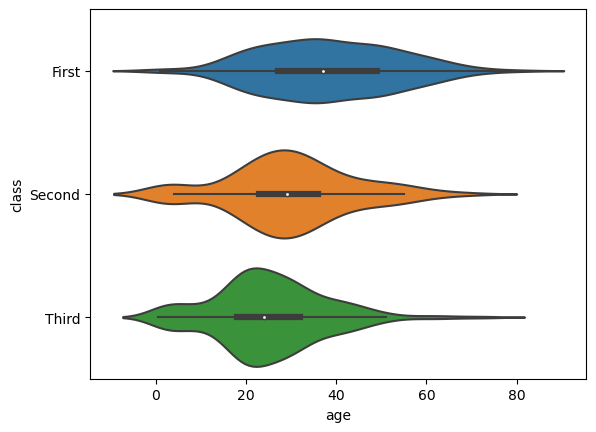

In [95]:
sns.violinplot(data=df, x="age", y="class")

By default, the orientation of the plot is determined by the variable types, preferring to group by a categorical variable:

<Axes: xlabel='class', ylabel='age'>

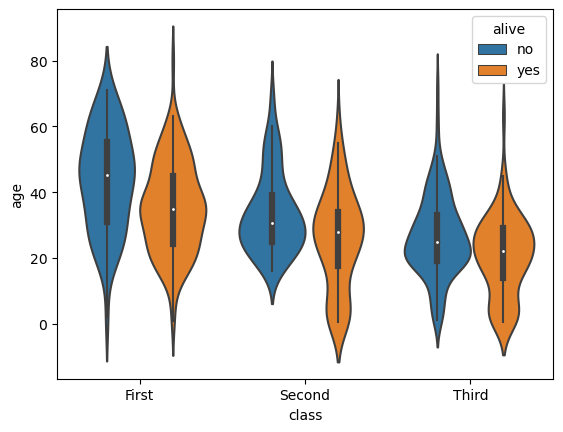

In [99]:
sns.violinplot(data=df, x="class", y="age", hue="alive")

Draw “split” violins to take up less space, and only show the data quarties:

<Axes: xlabel='class', ylabel='age'>

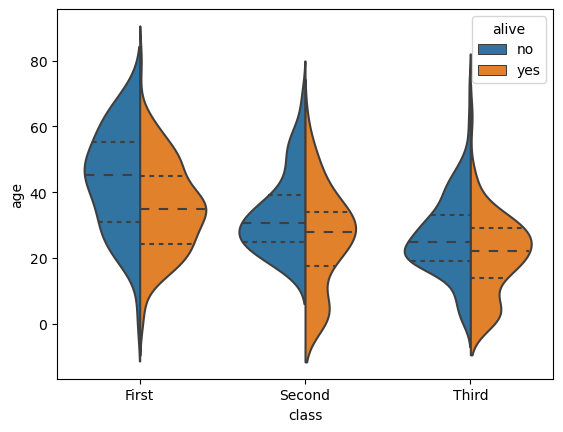

In [100]:
sns.violinplot(data=df, x="class", y="age", hue="alive", split=True, inner="quart")

Starting in version 0.13.0, it is possilbe to “split” single violins:

<Axes: xlabel='class', ylabel='age'>

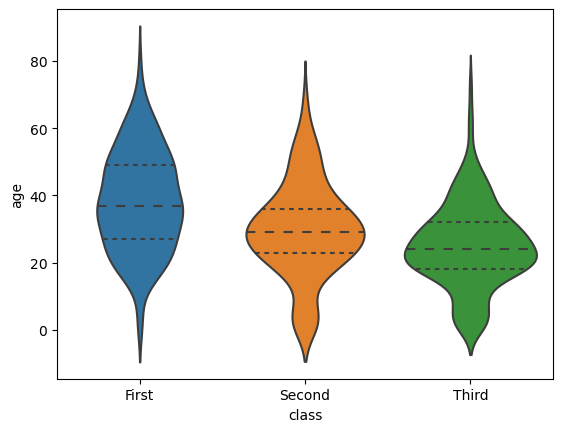

In [103]:
sns.violinplot(data=df, x="class", y="age", split=True, inner="quart")

Represent every observation inside the distribution by setting inner="stick" or inner="point":

<Axes: xlabel='age', ylabel='deck'>

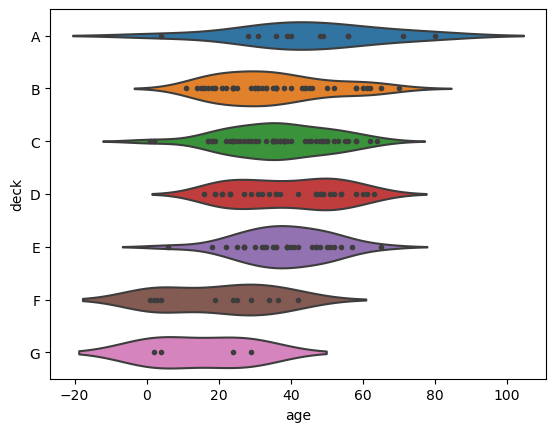

In [104]:
sns.violinplot(data=df, x="age", y="deck", inner="point")

Normalize the width of each violin to represent the number of observations:

<Axes: xlabel='age', ylabel='deck'>

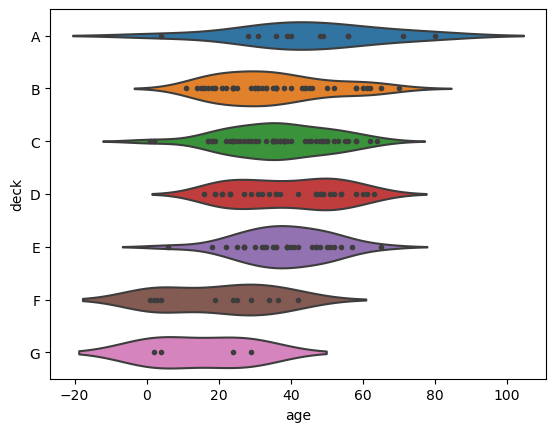

In [105]:
sns.violinplot(data=df, x="age", y="deck", inner="point", density_norm="count")

<Axes: xlabel='age', ylabel='alive'>

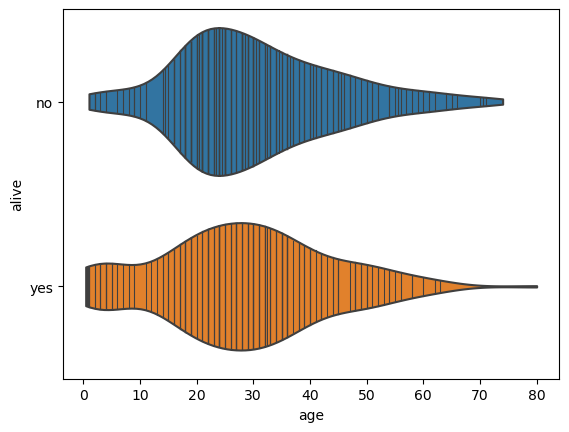

In [106]:
sns.violinplot(data=df, x="age", y="alive", cut=0, inner="stick")

### Pairplot

By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

It is also possible to show a subset of variables or plot different variables on the rows and columns.

This is a high-level interface for PairGrid that is intended to make it easy to draw a few common styles. You should use PairGrid directly if you need more flexibility.

The simplest invocation uses scatterplot() for each pairing of the variables and histplot() for the marginal plots along the diagona

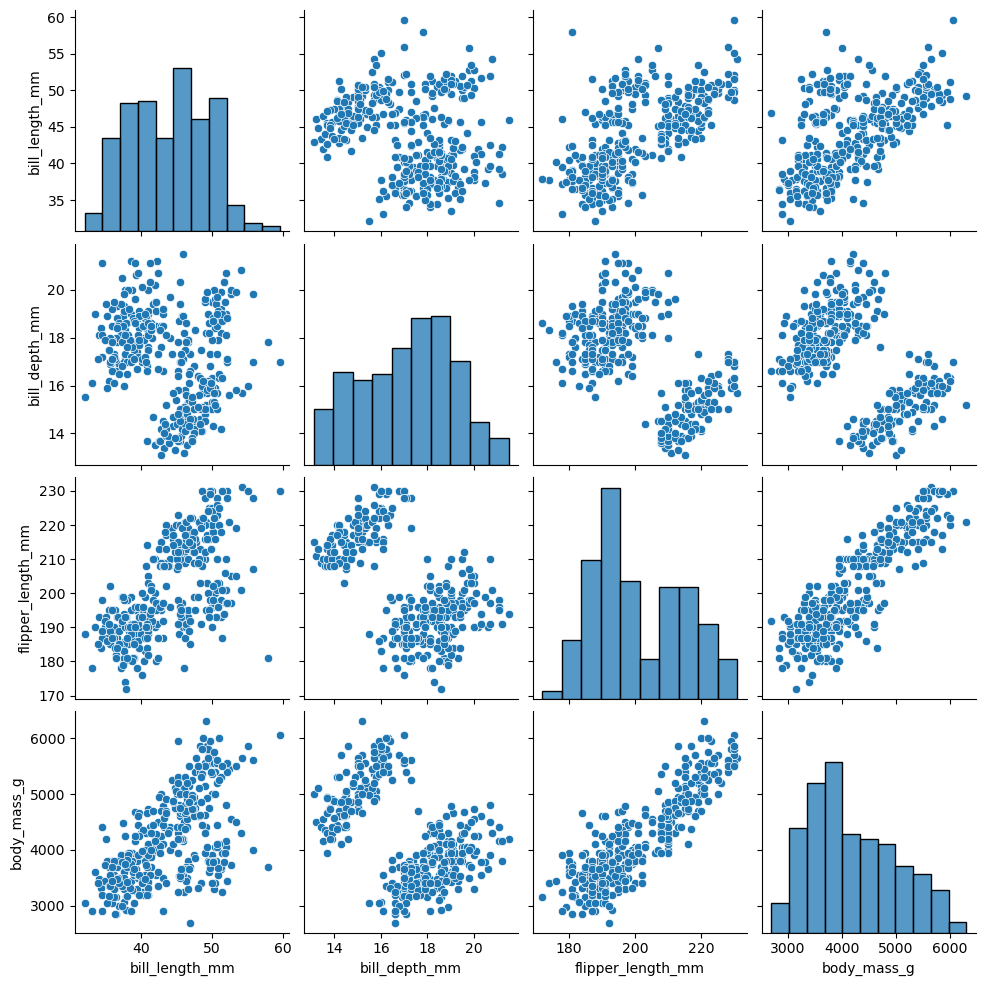

In [110]:
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins)

Assigning a hue variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE):

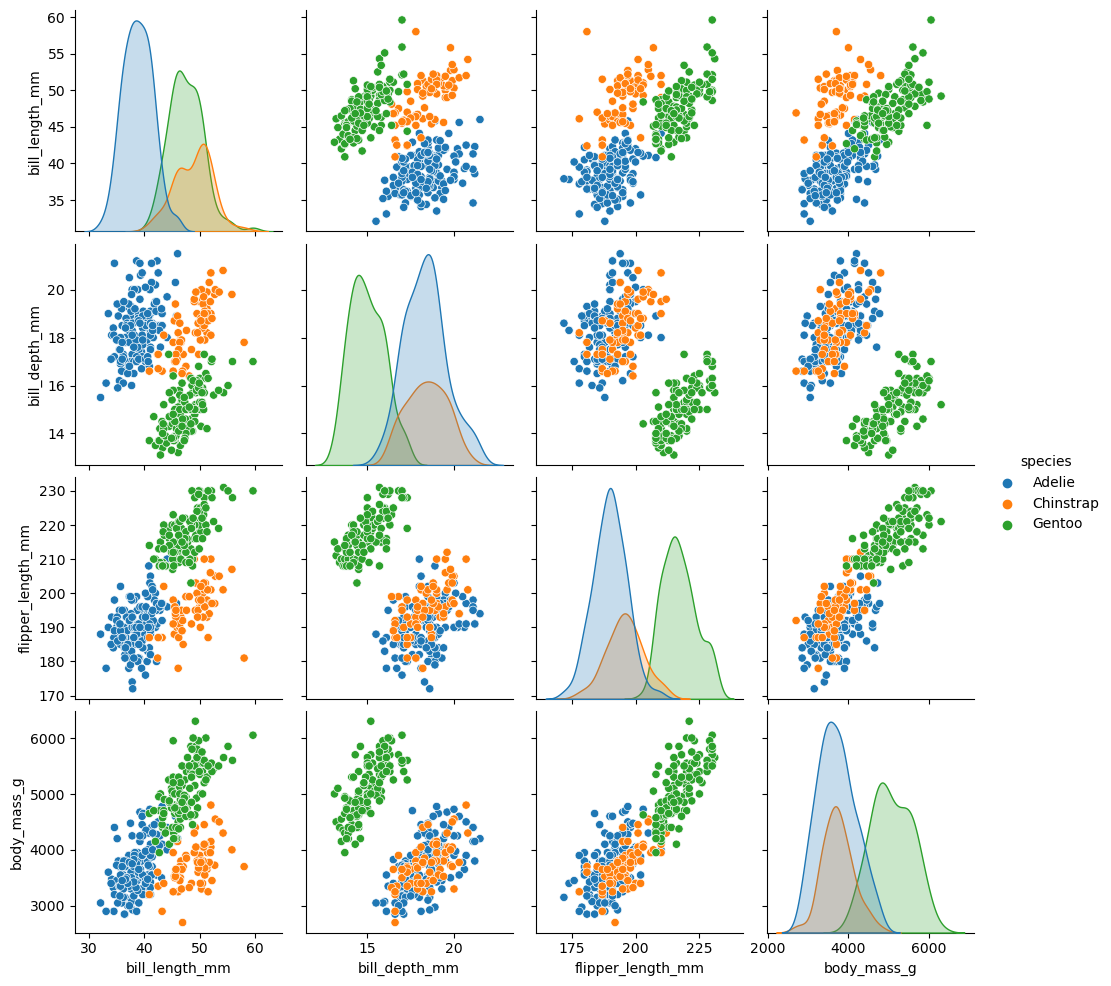

In [111]:
sns.pairplot(penguins, hue="species")

It’s possible to force marginal histograms:

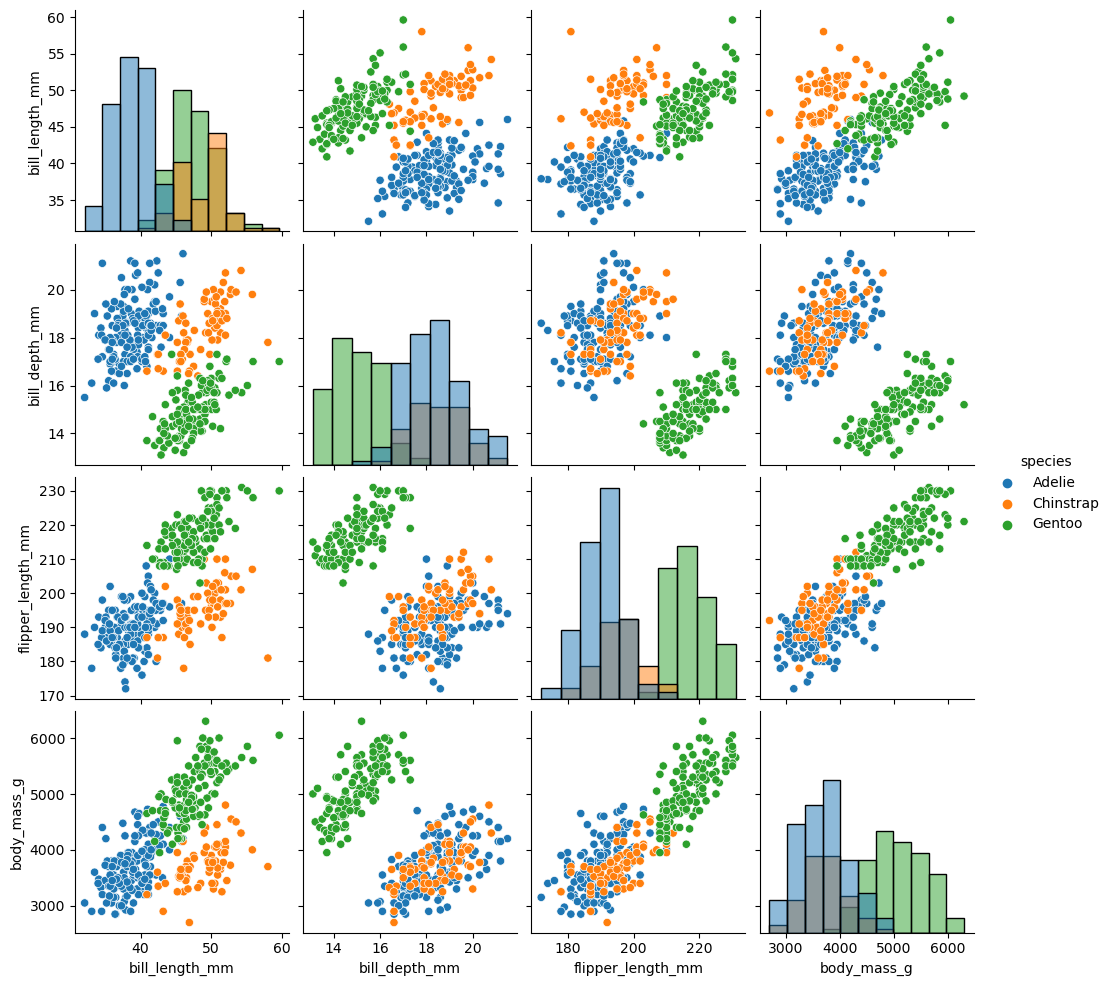

In [112]:
sns.pairplot(penguins, hue="species", diag_kind="hist")

The kind parameter determines both the diagonal and off-diagonal plotting style. Several options are available, including using kdeplot() to draw KDEs:

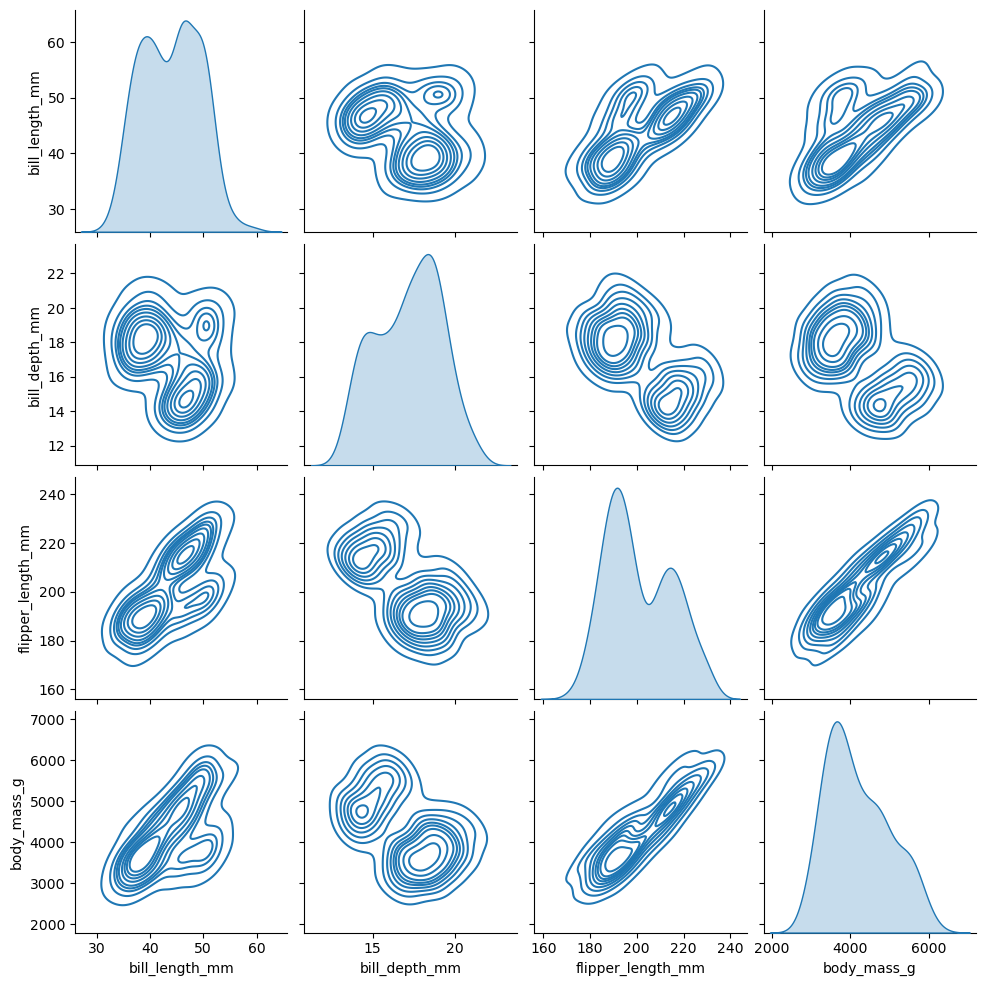

In [113]:
sns.pairplot(penguins, kind="kde")

### heatmap

This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument. Part of this Axes space will be taken and used to plot a colormap, unless cbar is False or a separate Axes is provided to cbar_ax.

<Axes: xlabel='Task', ylabel='Model'>

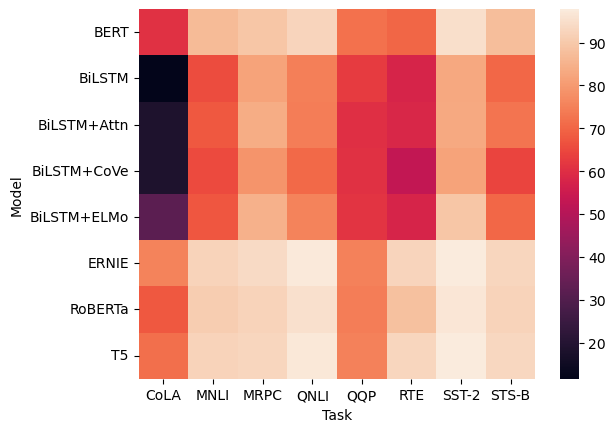

In [114]:
glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
sns.heatmap(glue)

Use annot to represent the cell values with text:

<Axes: xlabel='Task', ylabel='Model'>

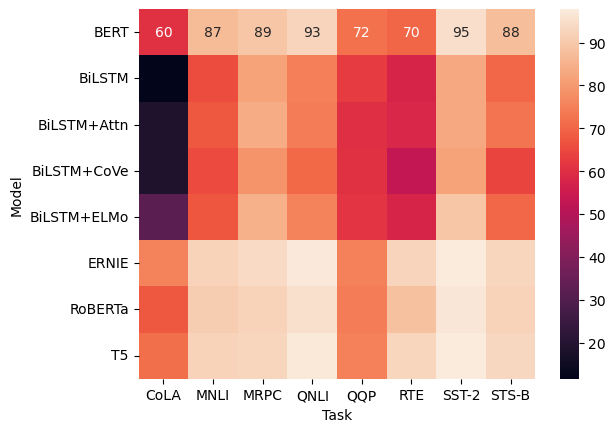

In [115]:
sns.heatmap(glue, annot=True)

Control the annotations with a formatting string:

<Axes: xlabel='Task', ylabel='Model'>

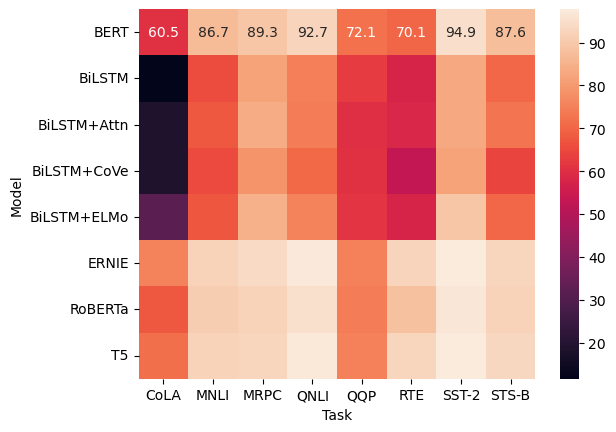

In [116]:
sns.heatmap(glue, annot=True, fmt=".1f")

Use a separate dataframe for the annotations:

<Axes: xlabel='Task', ylabel='Model'>

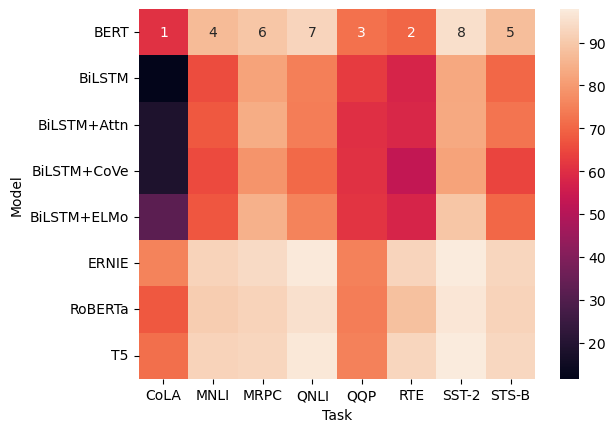

In [117]:
sns.heatmap(glue, annot=glue.rank(axis="columns"))

Add lines between cells:

<Axes: xlabel='Task', ylabel='Model'>

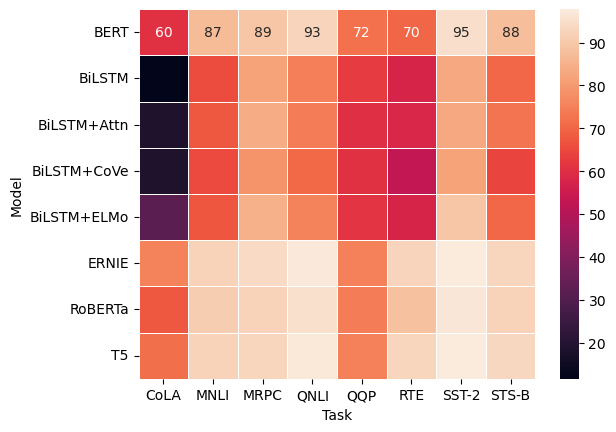

In [118]:
sns.heatmap(glue, annot=True, linewidth=.5)

Select a different colormap by name:

<Axes: xlabel='Task', ylabel='Model'>

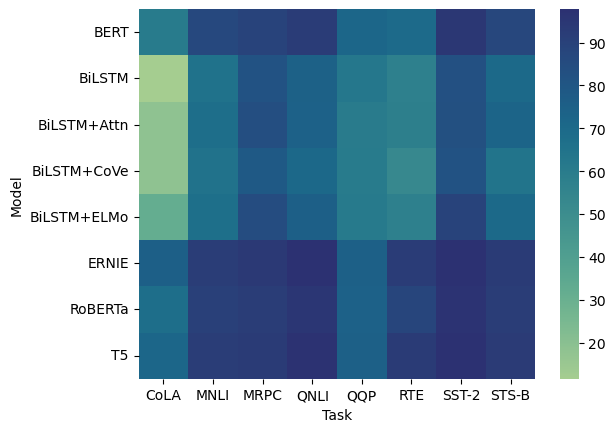

In [119]:
sns.heatmap(glue, cmap="crest")

Or pass a colormap object:

<Axes: xlabel='Task', ylabel='Model'>

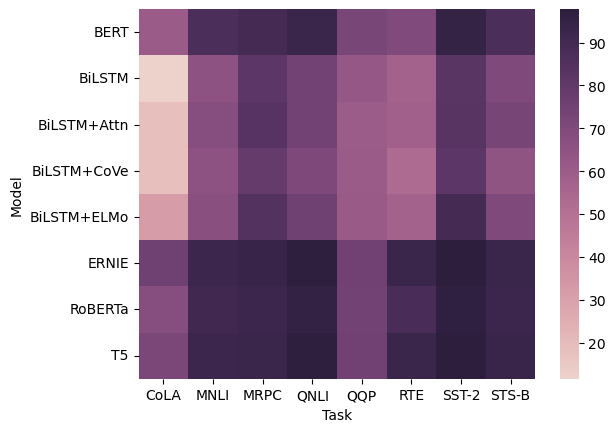

In [120]:
sns.heatmap(glue, cmap=sns.cubehelix_palette(as_cmap=True))

Set the colormap norm (data values corresponding to minimum and maximum points):

<Axes: xlabel='Task', ylabel='Model'>

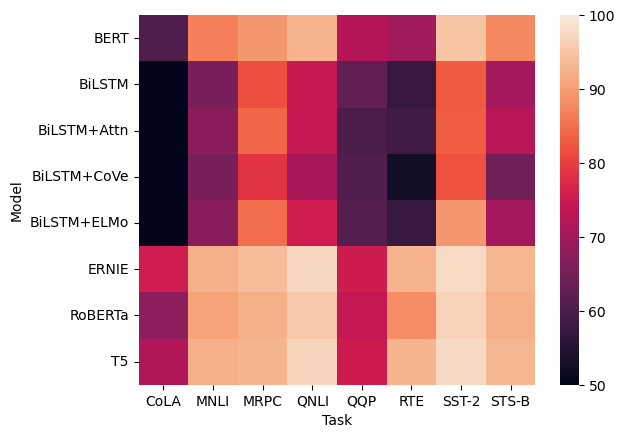

In [121]:
sns.heatmap(glue, vmin=50, vmax=100)

Use methods on the matplotlib.axes.Axes object to tweak the plot:

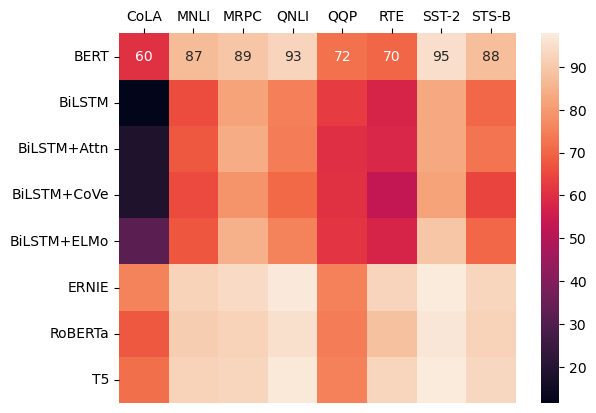

In [122]:
ax = sns.heatmap(glue, annot=True)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

### jointplot

This function provides a convenient interface to the JointGrid class, with several canned plot kinds. This is intended to be a fairly lightweight wrapper; if you need more flexibility, you should use JointGrid directly.

In the simplest invocation, assign x and y to create a scatterplot (using scatterplot()) with marginal histograms (using histplot()):

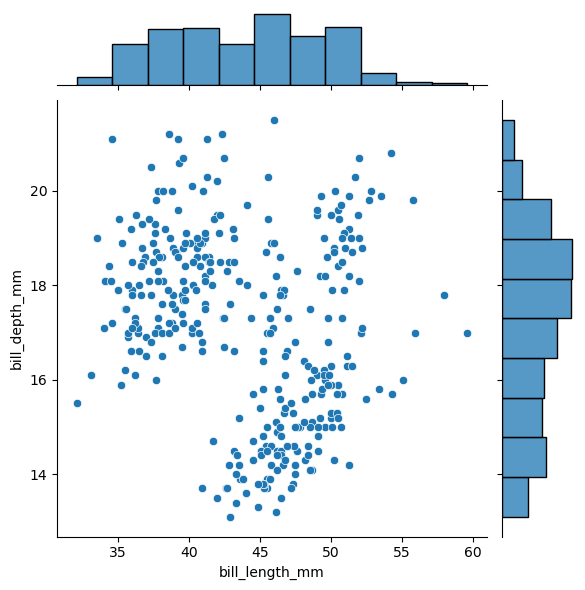

In [123]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

Assigning a hue variable will add conditional colors to the scatterplot and draw separate density curves (using kdeplot()) on the marginal axes:

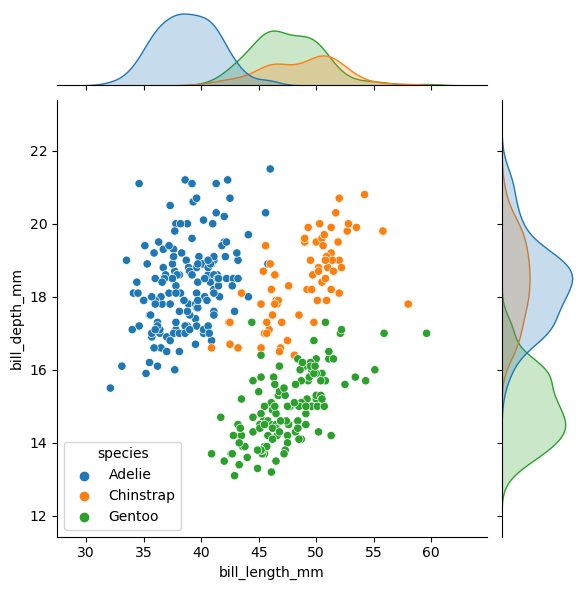

In [124]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

Several different approaches to plotting are available through the kind parameter. Setting kind="kde" will draw both bivariate and univariate KDEs:

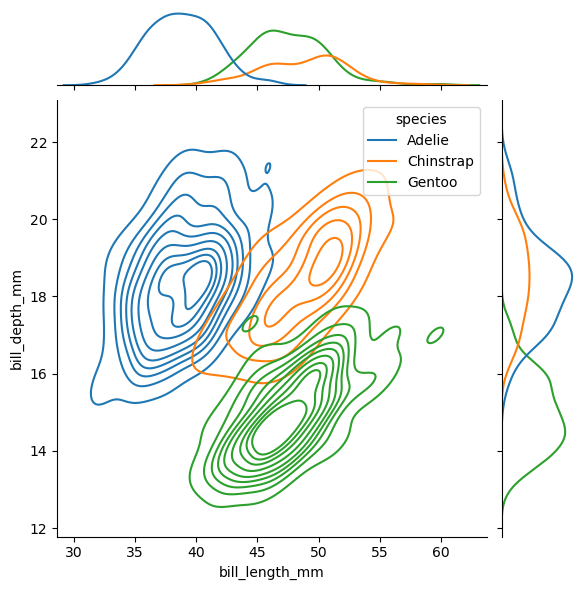

In [125]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

Set kind="reg" to add a linear regression fit (using regplot()) and univariate KDE curves:

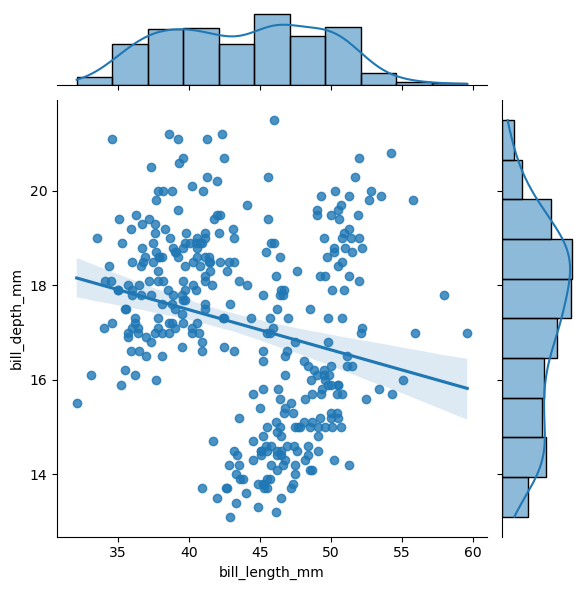

In [126]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="reg")

There are also two options for bin-based visualization of the joint distribution. The first, with kind="hist", uses histplot() on all of the axes:

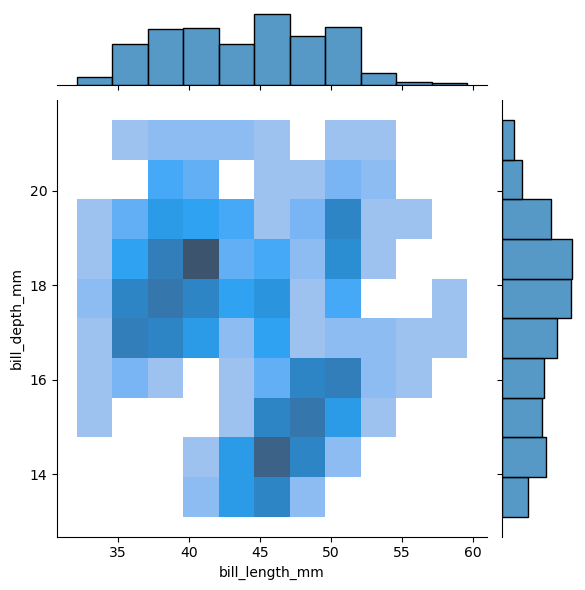

In [127]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="hist")

Alternatively, setting kind="hex" will use matplotlib.axes.Axes.hexbin() to compute a bivariate histogram using hexagonal bins:

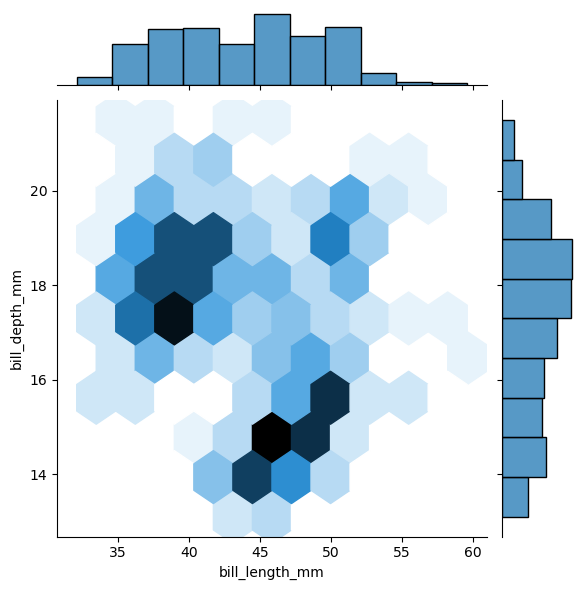

In [128]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="hex")

Additional keyword arguments can be passed down to the underlying plots:

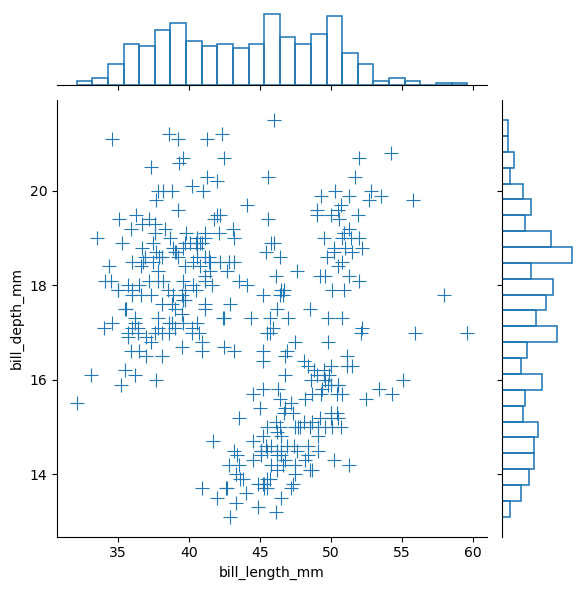

In [129]:
sns.jointplot(
    data=penguins, x="bill_length_mm", y="bill_depth_mm",
    marker="+", s=100, marginal_kws=dict(bins=25, fill=False),
)

### FacetGrid

Initialize the matplotlib figure and FacetGrid object.

This class maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset. The plots it produces are often called “lattice”, “trellis”, or “small-multiple” graphics.

It can also represent levels of a third variable with the hue parameter, which plots different subsets of data in different colors. This uses color to resolve elements on a third dimension, but only draws subsets on top of each other and will not tailor the hue parameter for the specific visualization the way that axes-level functions that accept hue will.

The basic workflow is to initialize the FacetGrid object with the dataset and the variables that are used to structure the grid. Then one or more plotting functions can be applied to each subset by calling FacetGrid.map() or FacetGrid.map_dataframe(). Finally, the plot can be tweaked with other methods to do things like change the axis labels, use different ticks, or add a legend. See the detailed code examples below for more information.

Calling the constructor requires a long-form data object. This initializes the grid, but doesn’t plot anything on it:



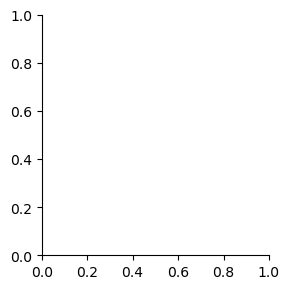

In [130]:
tips = sns.load_dataset("tips")
sns.FacetGrid(tips)

Assign column and/or row variables to add more subplots to the figure:

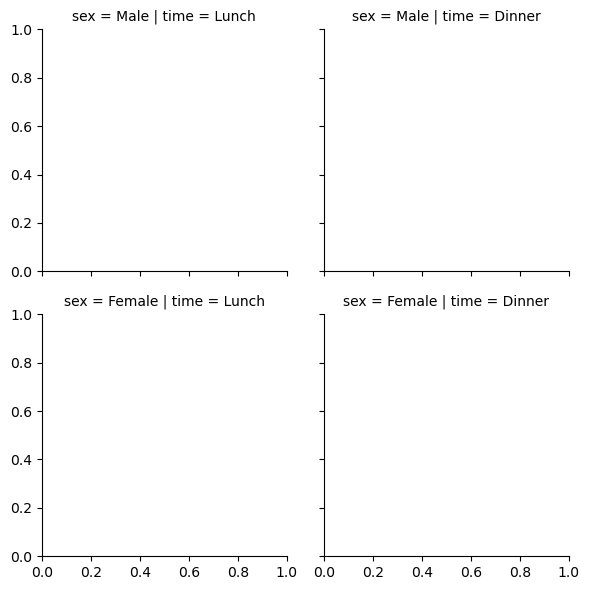

In [131]:
sns.FacetGrid(tips, col="time", row="sex")

To draw a plot on every facet, pass a function and the name of one or more columns in the dataframe to FacetGrid.map():

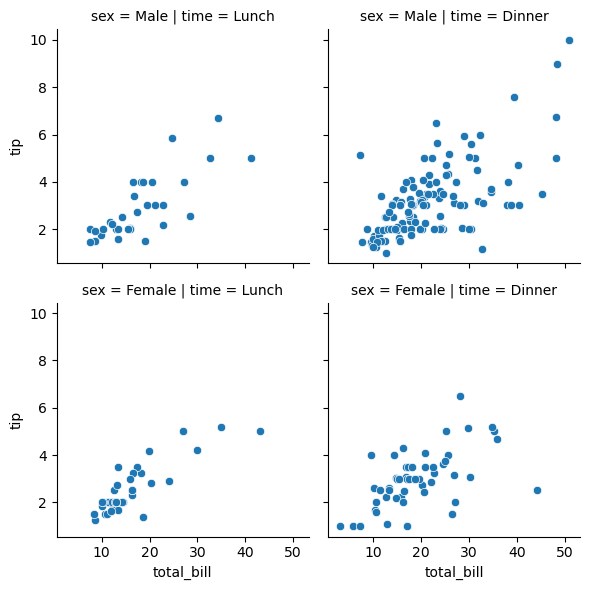

In [132]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map(sns.scatterplot, "total_bill", "tip")

The variable specification in FacetGrid.map() requires a positional argument mapping, but if the function has a data parameter and accepts named variable assignments, you can also use FacetGrid.map_dataframe():

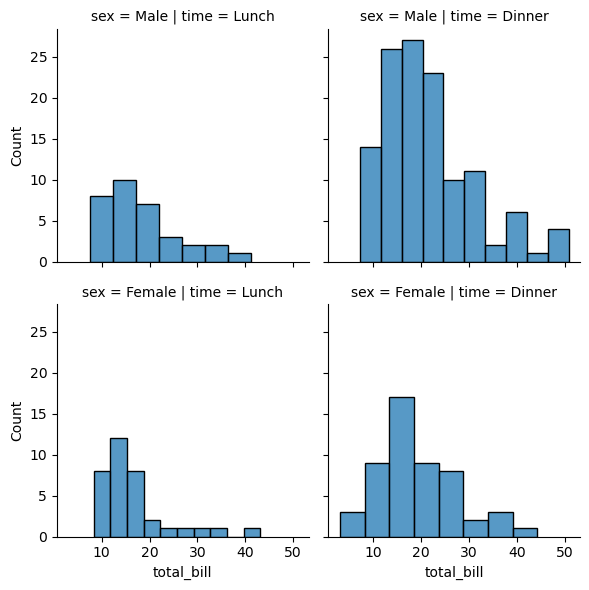

In [133]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map_dataframe(sns.histplot, x="total_bill")

The size and shape of the plot is specified at the level of each subplot using the height and aspect parameters:

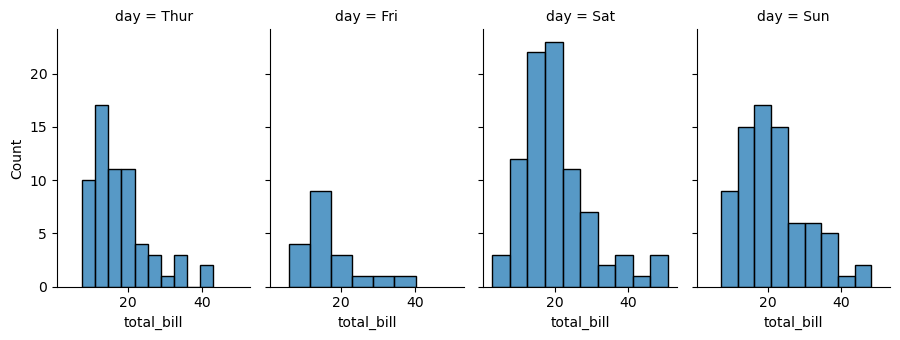

In [134]:
g = sns.FacetGrid(tips, col="day", height=3.5, aspect=.65)
g.map(sns.histplot, "total_bill")

If the variable assigned to col has many levels, it is possible to “wrap” it so that it spans multiple rows:

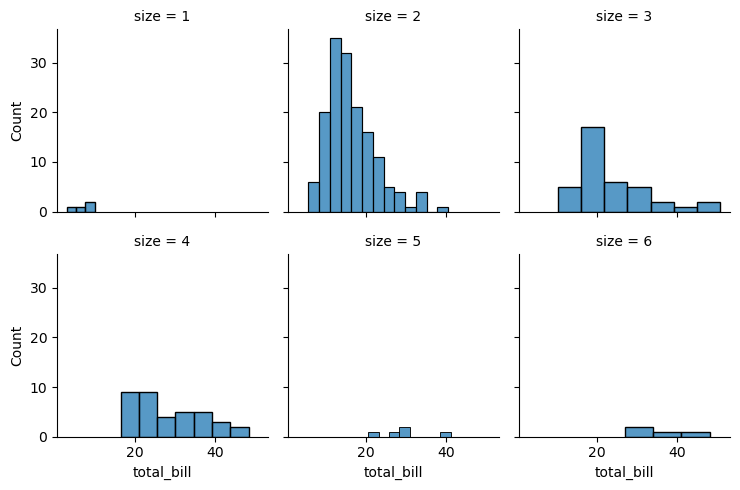

In [135]:
g = sns.FacetGrid(tips, col="size", height=2.5, col_wrap=3)
g.map(sns.histplot, "total_bill")

To add horizontal or vertical reference lines on every facet, use FacetGrid.refline():

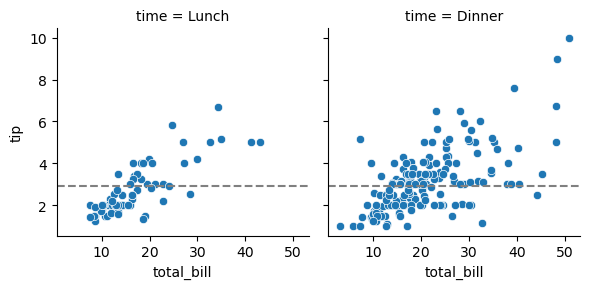

In [136]:
g = sns.FacetGrid(tips, col="time", margin_titles=True)
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.refline(y=tips["tip"].median())

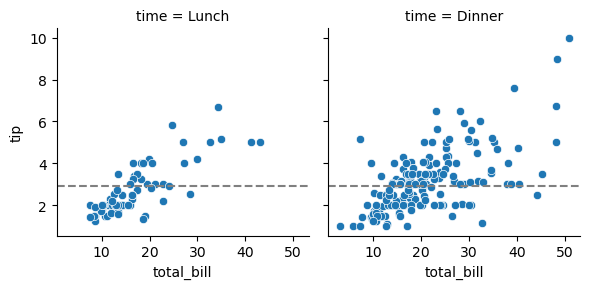

In [137]:
g = sns.FacetGrid(tips, col="time", margin_titles=True)
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.refline(y=tips["tip"].median())